# **SUPERMARKET PRICE EVOLUTION ANALYSIS**

📖 Description and characteristics of products with their price and description in the main supermarkets in Spain.

The following are the characteristics of this dataset:

Estimated volume: 50000 records every 24 hours
History: available since 2021-03

📚 Column documentation Below are the columns of the dataset along with their description. Clicking on each one of them will give you access to an example of the values they can take.

- category: Product category.

- description: Additional product information (packaging format, etc.).

- insert_date: Date of information extraction.

- name: Product name.

- price: Absolute price of the product in €. If there is any kind of discount, the lowest available price will appear.

- reference_price: Unit price (per unit of measurement of the product, €/Kg, €/L, etc.).

- reference_unit: Reference unit of the product (Kg, L, etc.).

- supermarket: Supermarket to which the product belongs.

## Two more variables used:

- **EUROPEAN CENTRAL BANK's** Measuring inflation – the Harmonised Index of Consumer Prices (HICP):
  - https://www.ecb.europa.eu/stats/macroeconomic_and_sectoral/hicp/html/index.es.html




- **Spanish National Statistics Institute:**
Índices nacionales: general y de grupos ECOICOP:
  - https://www.ine.es/jaxiT3/Datos.htm?t=50902

## Import libraries:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns
import numpy as np
import re
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle 
import warnings
from prophet import Prophet
import itertools
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 


In [ ]:
pip install adtk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 KB 2.8 MB/s eta 0:00:00


## Functions:

In [ ]:
def show_statistics(var_data):
  
  #get principal statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

In [ ]:
def get_data(dataframe):
    dataframe['insert_date'] = dataframe['insert_date'].astype(str)
    
    dataframe["year"] = dataframe["insert_date"].apply(lambda x: x[0:4])
    dataframe["month"] = dataframe["insert_date"].apply(lambda x: x[5:7])
    dataframe["day"] = dataframe["insert_date"].apply(lambda x: x[8:10])

    dataframe["year_month"] = dataframe['year'].astype(str) +"-"+ dataframe["month"]
    
    dataframe['insert_date'] = pd.to_datetime(dataframe['insert_date'])
    dataframe['insert_date'] = pd.to_datetime(dataframe['insert_date'], format='%y/%m/%d')

## Import dataset:

In [ ]:
#df_original = pd.read_csv('datamarket_productos_de_supermercados (3).csv')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = "/content/drive/MyDrive/DATA SCIENCE/PROYECTOS/PRECIOS ALIMENTOS/datamarket_productos_de_supermercados.csv"
df_original = pd.read_csv(path1)

In [ ]:
path2 = "/content/drive/MyDrive/DATA SCIENCE/PROYECTOS/PRECIOS ALIMENTOS/inflation_ecb_europa_spain_food_beverages.xlsx"
df_ecb_europa = pd.read_excel(path2)

In [ ]:
path3 = "/content/drive/MyDrive/DATA SCIENCE/PROYECTOS/PRECIOS ALIMENTOS/ipc_alimentos_bebidas_ine_datos.xlsx"
df_ine = pd.read_excel(path3)

#### Data Alimentos DATAMARKET:

In [ ]:
df = df_original

#to datetime
df['insert_date'] = pd.to_datetime(df['insert_date'])
df['insert_date'] = pd.to_datetime(df['insert_date'], format='%y/%m/%d')

#apply the function
get_data(df)

df.head(2)

,url,supermarket,category,name,description,price,reference_price,reference_unit,insert_date,product_id,year,month,day,year_month
0,https://www.dia.es/compra-online/productos/per...,dia-es,perfumeria_e_higiene_cuidado_corporal_cremas_c...,BACTINEL leche corporal con aceite de almendra...,NaN,6.89,22.97,l,2021-03-06,470e9795e77d267c97114368f95a60ba,2021,03,06,2021-03
1,https://www.dia.es/compra-online/productos/dro...,dia-es,drogueria_y_limpieza_limpiadores_para_el_hogar...,TENSO Pro limpia muebles pistola 750 ml,NaN,2.69,3.59,l,2021-03-06,ebd579231c922c04cb33da2146fd675d,2021,03,06,2021-03


#### Ecb_europa:

In [ ]:
df_ecb_europa.columns

Index(['ICP_ITEM_DESC - Split 1', 'OBS_DATE', 'Ref Area', 'Reference area',
       'Text for title hist series', 'hyperlink', 'Máx. OBS_DATE',
       'EA avg value', 'EA hist value', 'OBS_VALUE_ANR'],
      dtype='object')

In [ ]:
df_ecb_europa = df_ecb_europa[['OBS_DATE','OBS_VALUE_ANR', 'EA hist value']]
df_ecb_europa = df_ecb_europa.rename({'OBS_DATE': 'insert_date','EA hist value':'EA_hist_value'}, axis='columns')

In [ ]:
df_ecb_europa['insert_date'] = pd.to_datetime(df_ecb_europa['insert_date'], format='%y/%m/%d')
get_data(df_ecb_europa)

In [ ]:
df_ecb_europa.head(2)

,insert_date,OBS_VALUE_ANR,EA_hist_value,year,month,day,year_month
0,2021-02-28,1.6,0.8,2021,02,28,2021-02
1,2021-03-31,1.4,0.7,2021,03,31,2021-03


#### INE Alimentos y bebidas:

In [ ]:
df_ine.columns

Index(['01 Alimentos y bebidas no alcohólicas', 'Índice'], dtype='object')

In [ ]:
df_ine= df_ine.rename({'01 Alimentos y bebidas no alcohólicas': 'insert_date','Índice': 'indice_ine'}, axis='columns')

In [ ]:
df_ine['insert_date'] = df_ine['insert_date'].astype(str)

In [ ]:
df_ine["year"] = df_ine["insert_date"].apply(lambda x: x[4:8])
df_ine["month"] = df_ine["insert_date"].apply(lambda x: x[9:11])
df_ine["year_month"] = df_ine['year'].astype(str) +"-"+ df_ine["month"]

In [ ]:
df_ine.head(2)

,insert_date,indice_ine,year,month,year_month
0,2022M12,119.044,2022,12,2022-12
1,2022M11,117.185,2022,11,2022-11


#### Merge the 3 datasets:

In [ ]:
df = df.merge(df_ecb_europa[['year_month','OBS_VALUE_ANR','EA_hist_value']], on='year_month', how='left')

In [ ]:
df = df.merge(df_ine[['year_month','indice_ine']], on='year_month', how='left')

## About the dataset:

In [ ]:
df.shape

(9899144, 17)

In [ ]:
df.columns

Index(['url', 'supermarket', 'category', 'name', 'description', 'price',
       'reference_price', 'reference_unit', 'insert_date', 'product_id',
       'year', 'month', 'day', 'year_month', 'OBS_VALUE_ANR', 'EA_hist_value',
       'indice_ine'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9899144 entries, 0 to 9899143
Data columns (total 17 columns):
 #   Column           Dtype         
---  ------           -----         
 0   url              object        
 1   supermarket      object        
 2   category         object        
 3   name             object        
 4   description      object        
 5   price            float64       
 6   reference_price  float64       
 7   reference_unit   object        
 8   insert_date      datetime64[ns]
 9   product_id       object        
 10  year             object        
 11  month            object        
 12  day              object        
 13  year_month       object        
 14  OBS_VALUE_ANR    float64       
 15  EA_hist_value    float64       
 16  indice_ine       float64       
dtypes: datetime64[ns](1), float64(5), object(11)
memory usage: 1.3+ GB


In [ ]:
df.head(2)

,url,supermarket,category,name,description,price,reference_price,reference_unit,insert_date,product_id,year,month,day,year_month,OBS_VALUE_ANR,EA_hist_value,indice_ine
0,https://www.dia.es/compra-online/productos/per...,dia-es,perfumeria_e_higiene_cuidado_corporal_cremas_c...,BACTINEL leche corporal con aceite de almendra...,NaN,6.89,22.97,l,2021-03-06,470e9795e77d267c97114368f95a60ba,2021,03,06,2021-03,1.4,0.7,98.986
1,https://www.dia.es/compra-online/productos/dro...,dia-es,drogueria_y_limpieza_limpiadores_para_el_hogar...,TENSO Pro limpia muebles pistola 750 ml,NaN,2.69,3.59,l,2021-03-06,ebd579231c922c04cb33da2146fd675d,2021,03,06,2021-03,1.4,0.7,98.986


#### Duplicated and null values:

In [ ]:
# duplicated: 

#We don't have any duplicated row

df.duplicated().sum()

0

In [ ]:
null_values = pd.DataFrame({'Null Values' : df.isna().sum(), '% Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null_values

,Null Values,% Null Values
url,0,0.000000
supermarket,0,0.000000
category,0,0.000000
name,355,0.003586
description,6283482,63.475003
price,18,0.000182
reference_price,6,0.000061
reference_unit,5480,0.055358
insert_date,0,0.000000
product_id,0,0.000000


In [ ]:
df = df[df['category'].notnull()]

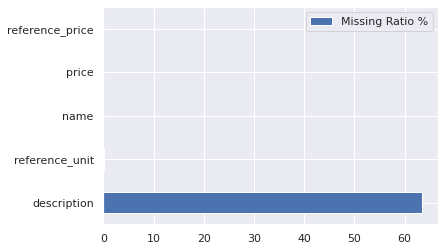

In [ ]:
def plot_null_values(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_null_values(df)

# **EDA**:

## Histogram for each numerical variable:

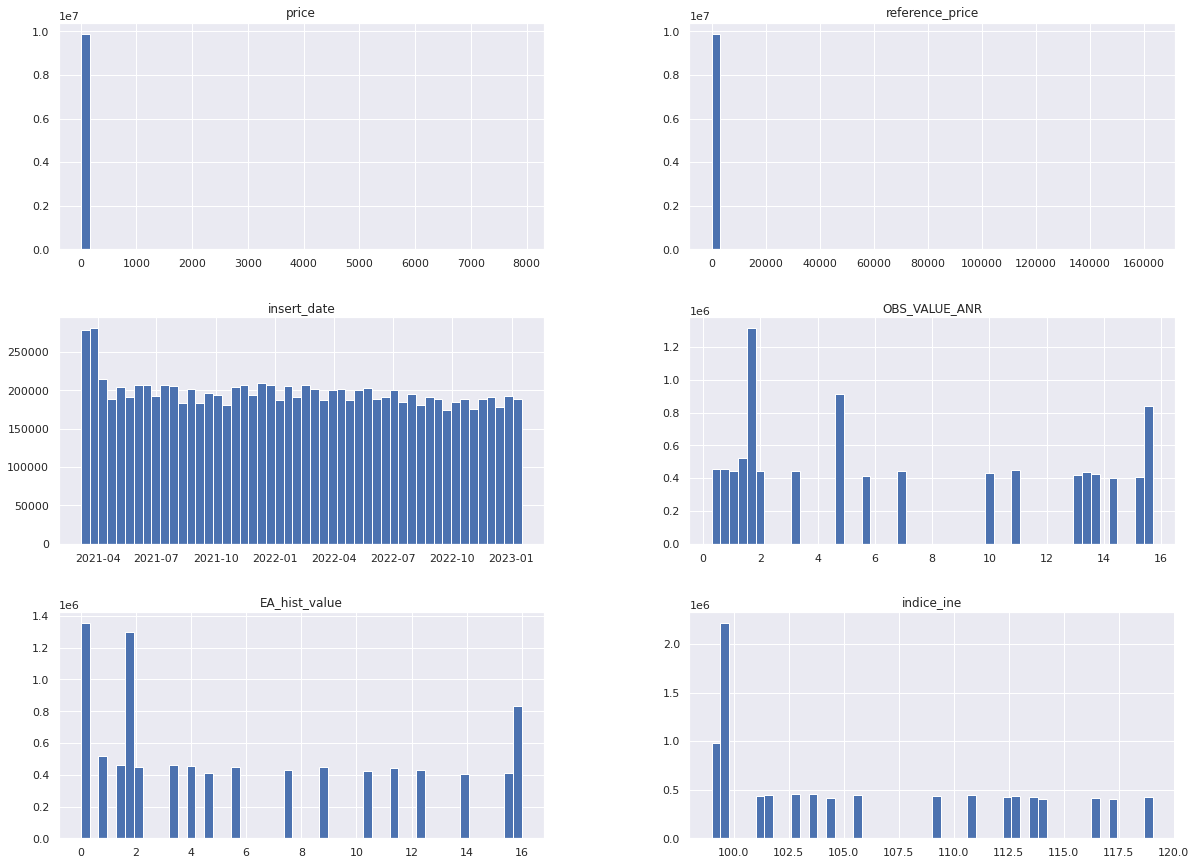

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Variables:

### *category:*

In [ ]:
#We have too many categories: 

df.category.nunique()

1504

<AxesSubplot:title={'center':'The first 20 categories with most registers'}, ylabel='category'>

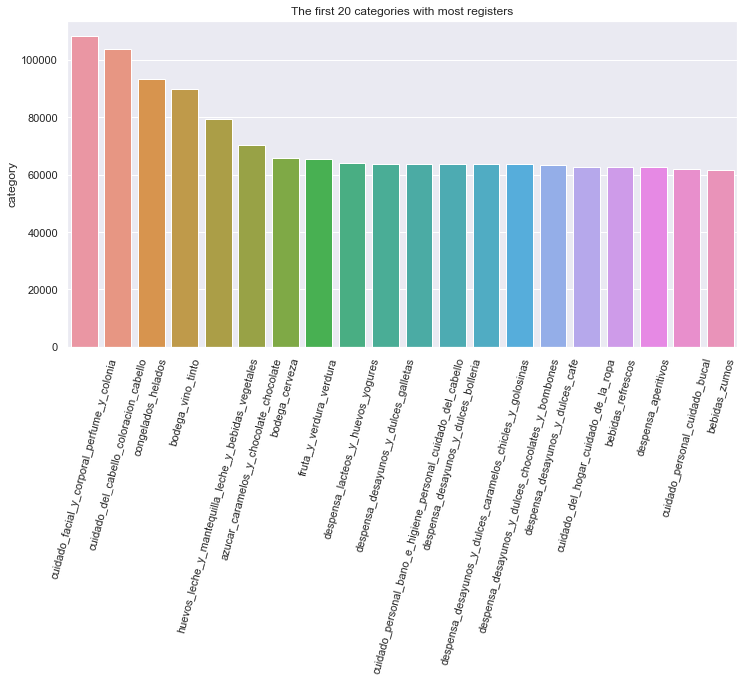

In [ ]:
top_categories = df.category.value_counts().head(20)
top_categories

plt.figure(figsize = (12,6))
plt.xticks(rotation=75)
plt.title('The first 20 categories with most registers')
sns.barplot(x=top_categories.index, y= top_categories)

#### New categories: 

In [ ]:
#If we get the first word of the category we'll have more less categories:

df["categoria"] = df["category"].apply(lambda x: x.split("_")[0])

We have: 41 different categories


<AxesSubplot:title={'center':'Categories'}, ylabel='categoria'>

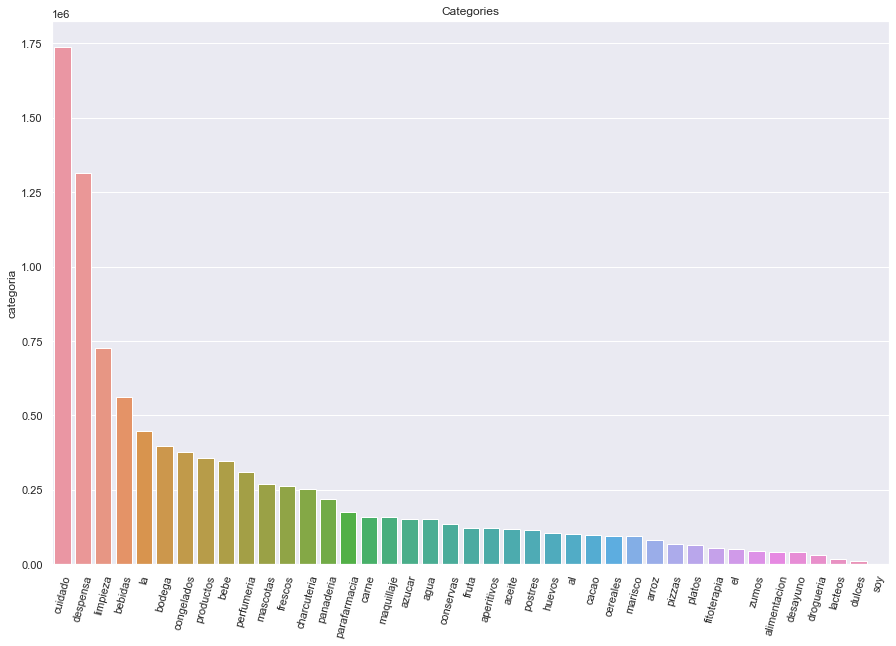

In [ ]:
categories = df.categoria.value_counts()

print(f"We have: {df.categoria.nunique()} different categories")

plt.figure(figsize = (15,10))
plt.xticks(rotation=75)
plt.title('Categories')
sns.barplot(x=categories.index, y= categories)

Now we have only 41 categories

### *price*:

In [ ]:
show_statistics(df['price'])

Minimum:0.08
Mean:4.78
Median:2.25
Mode:1.99
Maximum:7915.05



The maximum price is 7915 

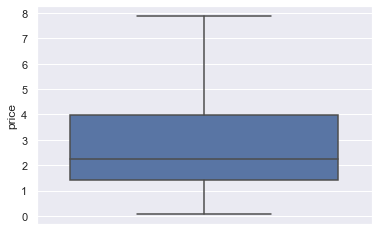

In [ ]:
sns.boxplot(y='price', data=df, showfliers=False)
plt.show()

Text(0.5, 1.0, 'Price vs. reference price')

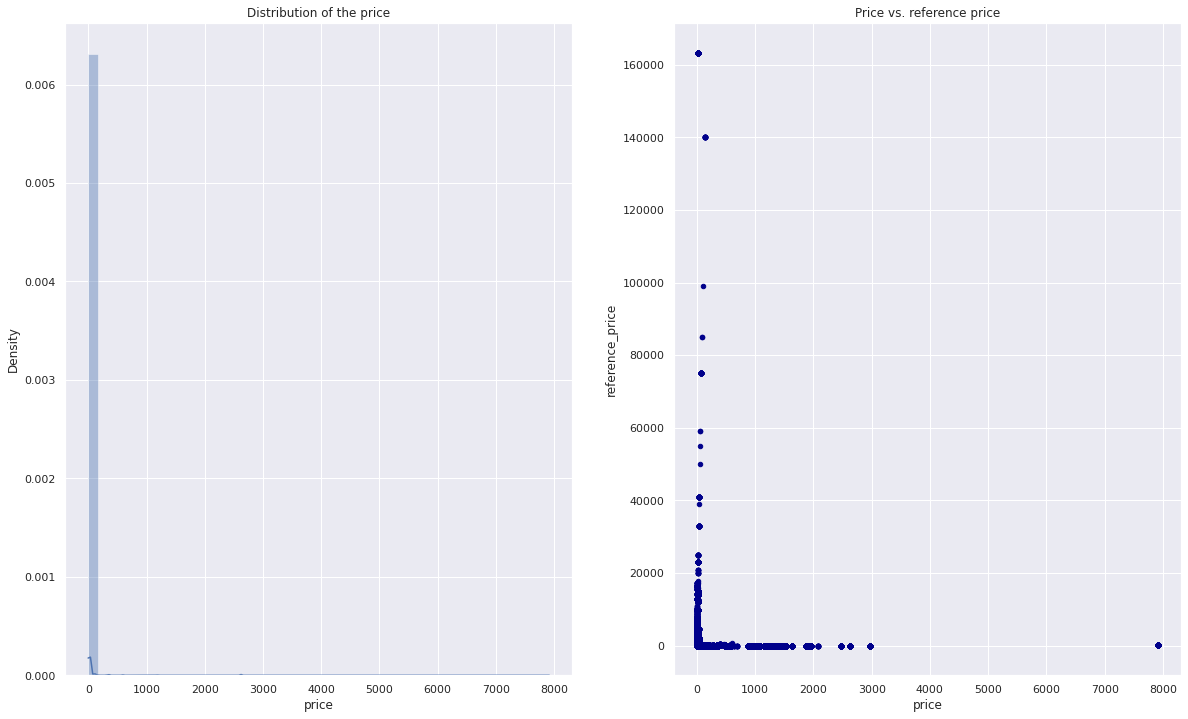

In [ ]:
f,ax = plt.subplots(1, 2, figsize=(20,12))

sns.distplot(df.price, ax=ax[0])
ax[0].set_title('Distribution of the price')


df.plot.scatter(x='price',
                y='reference_price',
                c='DarkBlue', ax=ax[1])
ax[1].set_title('Price vs. reference price')

(692, 1)


[<AxesSubplot:>]

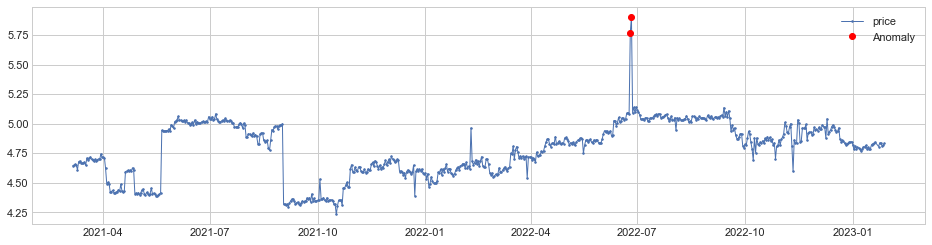

In [ ]:
#anomalies detection:

price_groupby_day = df.groupby(['insert_date'])['price'].mean().reset_index(name='price')
price_groupby_day = price_groupby_day.set_index('insert_date')
print(price_groupby_day.shape)

from adtk.detector import InterQuartileRangeAD

iqr = InterQuartileRangeAD(c=1.5) 

anomalies = iqr.fit_detect(price_groupby_day["price"])

# Graphical representation
from adtk.visualization import plot
plot(price_groupby_day["price"], anomaly=anomalies, ts_linewidth=1, ts_markersize=3,anomaly_color='red', anomaly_tag='marker', anomaly_markersize=6, anomaly_alpha=0.8)

#### Outliers:

We correct the extrange distribution of the data by filtering the outliers

In [ ]:
df1 = df[(df['price'] <=10) & (df['reference_price'] <=200)]


porcentaje = ((df.shape[0]-df1.shape[0])/df.shape[0])
print('We are losing the {:.2f}% of the data\n'.format(porcentaje))

We are losing the 0.06% of the data



We get the new distribution of the price:

Text(0.5, 1.0, 'Price vs. reference price')

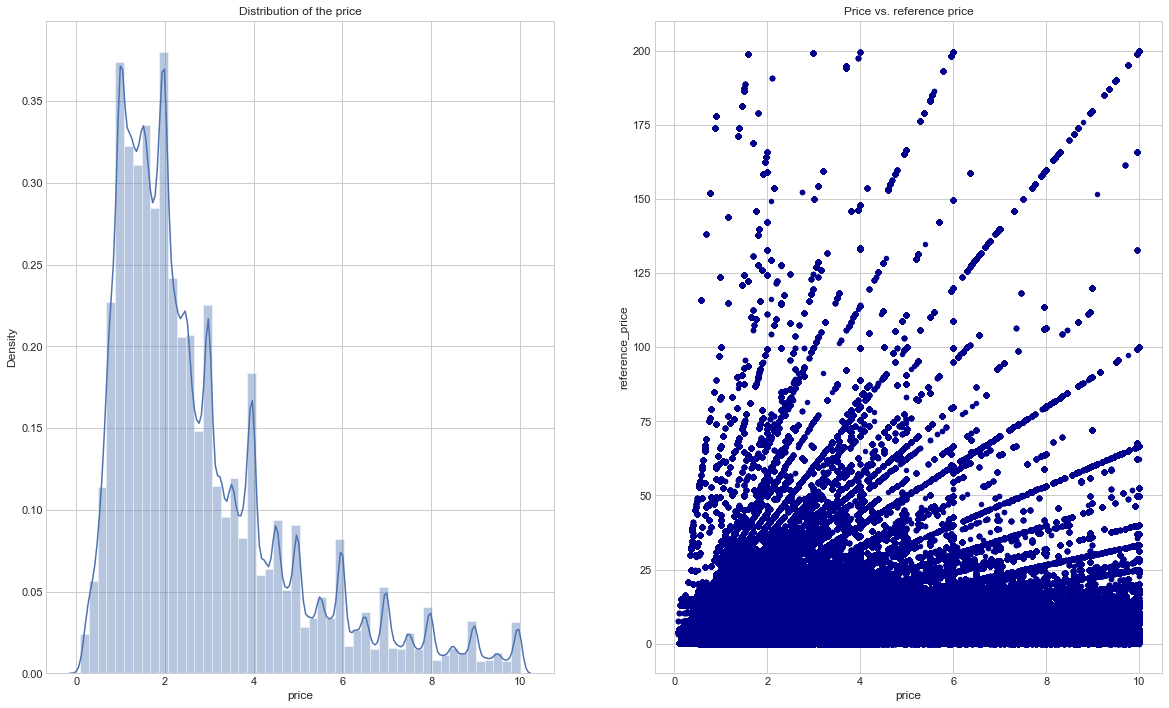

In [ ]:
f,ax = plt.subplots(1, 2, figsize=(20,12))

sns.distplot(df1.price, ax=ax[0])
ax[0].set_title('Distribution of the price')


df1.plot.scatter(x='price',
                y='reference_price',
                c='DarkBlue', ax=ax[1])
ax[1].set_title('Price vs. reference price')

We don't have detected anomalies

(690, 1)


[<AxesSubplot:>]

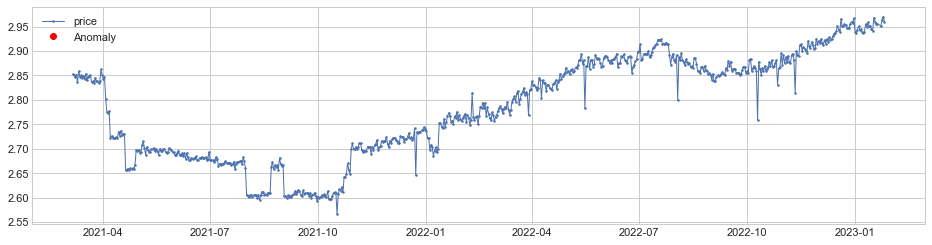

In [ ]:
#anomalies detection:

price_groupby_day = df1.groupby(['insert_date'])['price'].mean().reset_index(name='price')
price_groupby_day = price_groupby_day.set_index('insert_date')
print(price_groupby_day.shape)

from adtk.detector import InterQuartileRangeAD

iqr = InterQuartileRangeAD(c=1.5) 

anomalies = iqr.fit_detect(price_groupby_day["price"])

# Graphical representation
from adtk.visualization import plot
plot(price_groupby_day["price"], anomaly=anomalies, ts_linewidth=1, ts_markersize=3,anomaly_color='red', anomaly_tag='marker', anomaly_markersize=6, anomaly_alpha=0.8)

The new statistics of the price are:

In [ ]:
show_statistics(df1['price'])


Minimum:0.08
Mean:2.78
Median:2.15
Mode:1.99
Maximum:10.00



We can see the mean price of each categorie with the next boxplots:

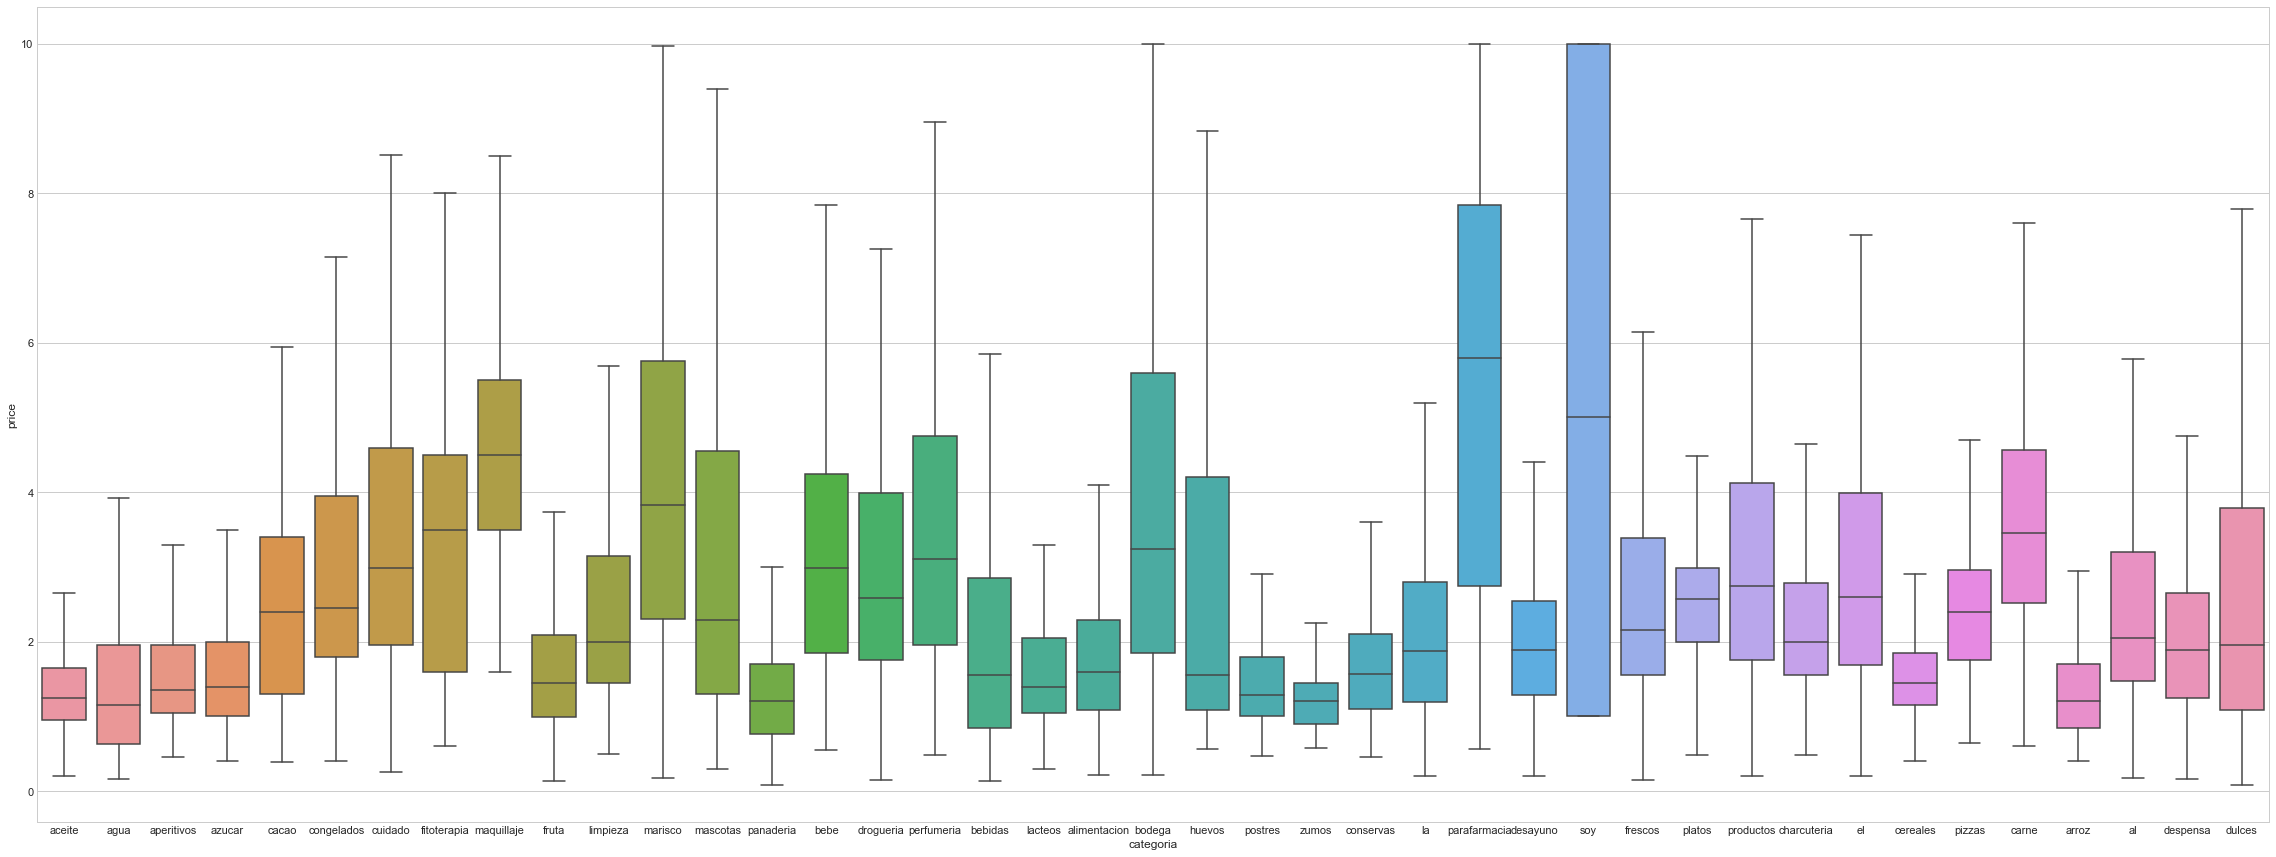

In [ ]:
f,ax = plt.subplots(1, 1, figsize=(40,15))
sns.boxplot(x='categoria', y='price', data=df1, showfliers=False)
plt.show()

### *insert_date*
We extract the year, month and the day from the *insert_date* column

In [ ]:
#We apply the function to get the data of each insert date:
#get_data(df1)

In [ ]:
df1.head(1)

,url,supermarket,category,name,description,price,reference_price,reference_unit,insert_date,product_id,categoria,year,month,day
0,https://www.dia.es/compra-online/productos/per...,dia-es,perfumeria_e_higiene_cuidado_corporal_cremas_c...,BACTINEL leche corporal con aceite de almendra...,NaN,6.89,22.97,l,2021-03-06,470e9795e77d267c97114368f95a60ba,perfumeria,2021,03,06


<AxesSubplot:xlabel='year', ylabel='count'>

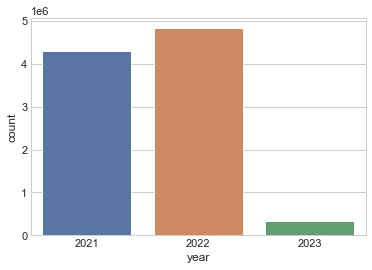

In [ ]:
sns.countplot(x=df1.year)

<AxesSubplot:xlabel='month', ylabel='count'>

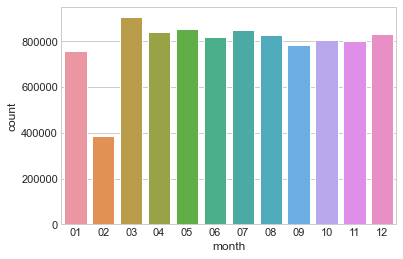

In [ ]:
sns.countplot(x=df1.month)

In [ ]:
df1 = df1.sort_values('month')

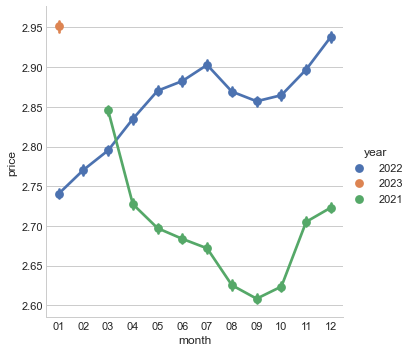

In [ ]:
sns.factorplot('month','price',data=df1,hue='year')
plt.show()

### *supermarket*:

In [ ]:
#We have too many categories: 

df1.supermarket.nunique()

3

<AxesSubplot:xlabel='supermarket', ylabel='count'>

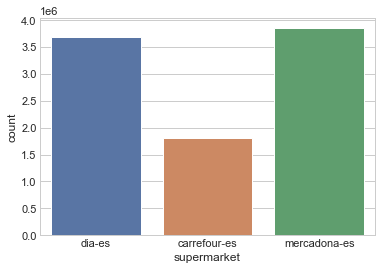

In [ ]:
sns.countplot(x=df1.supermarket)

Text(0.5, 1.0, 'Distribution of the data per supermarket')

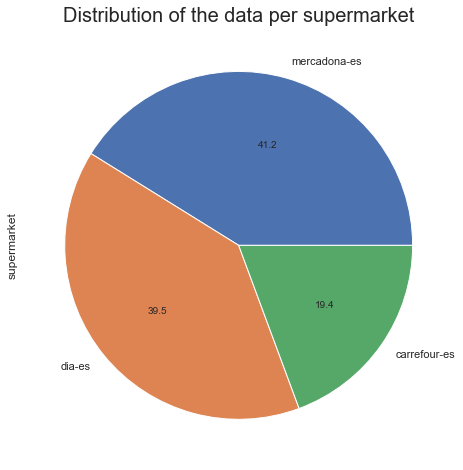

In [ ]:
f,ax=plt.subplots(figsize=(10,8)) 

df1['supermarket'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f", legend = False)
ax.set_title("Distribution of the data per supermarket", fontsize=20)

We separate on different dataframes for each supermarket:

In [ ]:
df_mercadona = df1[df1.supermarket == 'mercadona-es']
df_dia = df1[df1.supermarket == 'dia-es']
df_carrefour = df1[df1.supermarket == 'carrefour-es']

### *ECB*:

In [ ]:
df1.columns

Index(['url', 'supermarket', 'category', 'name', 'description', 'price',
       'reference_price', 'reference_unit', 'insert_date', 'product_id',
       'year', 'month', 'day', 'year_month', 'OBS_VALUE_ANR', 'EA_hist_value',
       'indice_ine', 'categoria'],
      dtype='object')

In [ ]:
sns.factorplot('month','OBS_VALUE_ANR',data=df1,hue='year')
plt.show()

### *Indice INE*:

### Correlation matrix

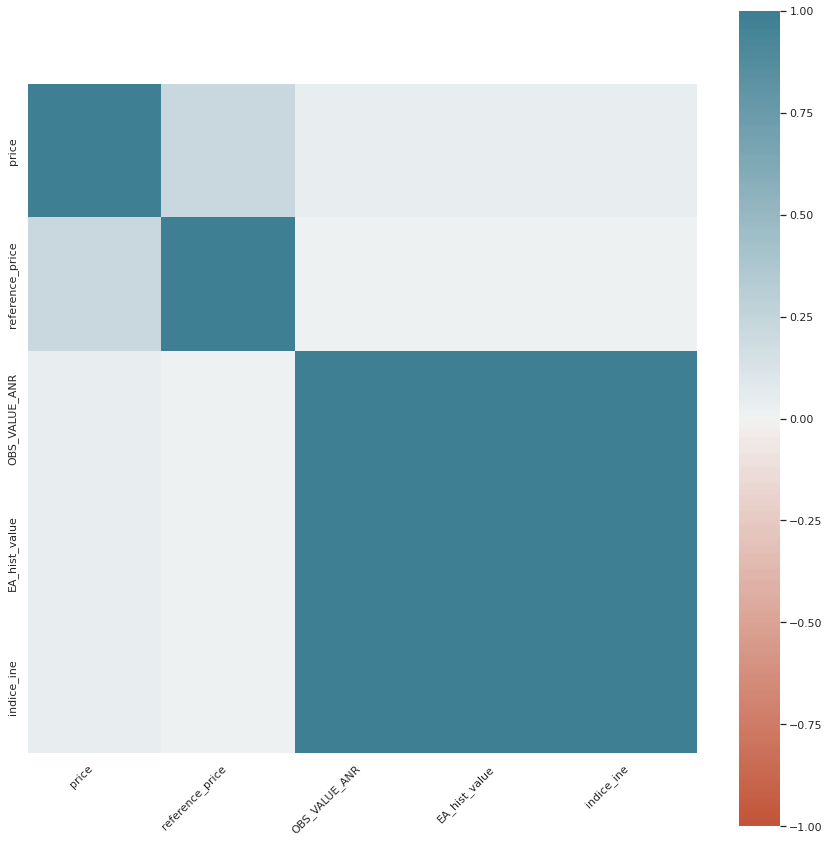

In [ ]:
corr = df1.corr()
gig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Analysis of the URL'S and different categories to see the possibilities to compare different supermarkets:



It's very difficult to compare different prices of categories between the supermarkets due to the difference of the data

In [ ]:
df_mercadona.url.unique()

array(['https://tienda.mercadona.es/product/3235/naranja-pieza',
       'https://tienda.mercadona.es/product/1094/chorizo-oreado-bandeja',
       'https://tienda.mercadona.es/product/2862/longaniza-fresca-pollo-bandeja',
       ...,
       'https://tienda.mercadona.es/product/67978/tarta-crema-avellana-blanca-hacendado-congelada',
       'https://tienda.mercadona.es/product/86758/salmon-natural-hacendado-pack-3',
       'https://tienda.mercadona.es/product/22008/snack-gato-barritas-compy-pollo-higado-pack-10'],
      dtype=object)

In [ ]:
df_dia.url.unique()

array(['https://www.dia.es/compra-online/productos/perfumeria-e-higiene/cuidado-corporal/cremas-cuerpo-body-milk/p/214056',
       'https://www.dia.es/compra-online/productos/drogueria-y-limpieza/limpiadores-para-el-hogar/limpia-muebles/p/231799',
       'https://www.dia.es/compra-online/productos/drogueria-y-limpieza/limpiadores-para-el-hogar/limpia-metales/p/151634',
       ...,
       'https://www.dia.es/compra-online/despensa/desayunos-y-dulces/caramelos-chicles-y-golosinas/p/152675',
       'https://www.dia.es/compra-online/despensa/desayunos-y-dulces/caramelos-chicles-y-golosinas/p/188690',
       'https://www.dia.es/compra-online/caducidad/despensa/desayunos-y-dulces/chocolates-y-bombones/p/107473'],
      dtype=object)

In [ ]:
df_carrefour.url.unique()

array(['https://www.carrefour.es/supermercado/ensalada-gourmet-carrefour-200-g-carrefour/R-521032378/p',
       'https://www.carrefour.es/supermercado/cogollos-carrefour-400-g/R-VC4AECOMM-235347/p',
       'https://www.carrefour.es/supermercado/lechuga-iceberg-carrefour-250-g/R-VC4AECOMM-478340/p',
       ...,
       'https://www.carrefour.es/supermercado/huevo-cocido-virgen-del-rosario-6-ud/R-prod61299/p',
       'https://www.carrefour.es/supermercado/pack-12-rotuladores-escritura-04-mm/R-prod372172/p',
       'https://www.carrefour.es/supermercado/10-tubos-tempera-10ml-carrefour/R-854700372/p'],
      dtype=object)

In [ ]:
print(f"El mercadona tiene: {df_mercadona.categoria.nunique()} categorias diferentes")
print(f"El DIA tiene: {df_dia.categoria.nunique()} categorias diferentes")
print(f"El Carrefour tiene: {df_carrefour.categoria.nunique()} categorias diferentes")

El mercadona tiene: 25 categorias diferentes
El DIA tiene: 19 categorias diferentes
El Carrefour tiene: 9 categorias diferentes


In [ ]:
pd.crosstab(df1.categoria,df1.supermarket).style.background_gradient(cmap='summer_r')

supermarket,carrefour-es,dia-es,mercadona-es
categoria,,,
aceite,0,0,114513
agua,0,0,149367
al,0,100251,0
alimentacion,0,41063,0
aperitivos,0,0,119202
arroz,0,0,79774
azucar,0,0,150715
bebe,79790,110377,103736
bebidas,207256,297422,0


In [ ]:
df_dia.categoria.unique()

array(['perfumeria', 'drogueria', 'alimentacion', 'bebidas', 'lacteos',
       'bebe', 'frescos', 'charcuteria', 'platos', 'productos',
       'congelados', 'mascotas', 'desayuno', 'soy', 'cuidado', 'despensa',
       'bodega', 'al', 'dulces'], dtype=object)

In [ ]:
df_carrefour.categoria.unique()

array(['el', 'la', 'perfumeria', 'bebidas', 'limpieza', 'parafarmacia',
       'mascotas', 'bebe', 'productos'], dtype=object)

In [ ]:
df_mercadona.categoria.unique()

array(['fruta', 'carne', 'charcuteria', 'cereales', 'congelados',
       'limpieza', 'maquillaje', 'conservas', 'huevos', 'fitoterapia',
       'cuidado', 'aceite', 'agua', 'arroz', 'aperitivos', 'azucar',
       'bebe', 'panaderia', 'bodega', 'cacao', 'marisco', 'mascotas',
       'pizzas', 'postres', 'zumos'], dtype=object)

## Difference of the price for each categorie:

In [ ]:
cat_año = pd.crosstab(aggfunc="mean",
            index = df1.categoria,
            columns = df1.year,
            values = df1.price)

cat_año['crecim1'] = cat_año['2022'] - cat_año['2021']
cat_año['crecim2'] = cat_año['2023'] - cat_año['2022']
cat_año['crecim_conjunto'] = cat_año['2023'] - cat_año['2021']

cat_año = cat_año.sort_values(by='crecim_conjunto', ascending=False)
cat_año

year,2021,2022,2023,crecim1,crecim2,crecim_conjunto
categoria,,,,,,
dulces,2.381082,2.659272,3.508021,0.278190,0.848750,1.126939
parafarmacia,4.952895,5.668704,5.807421,0.715809,0.138717,0.854526
marisco,4.147103,4.459689,4.973204,0.312586,0.513515,0.826101
congelados,2.928925,3.220773,3.532840,0.291848,0.312066,0.603915
carne,3.556643,3.936620,4.135638,0.379977,0.199018,0.578995
despensa,1.962918,2.240382,2.450076,0.277463,0.209694,0.487157
bodega,3.669886,3.891271,4.137473,0.221385,0.246202,0.467586
productos,2.975270,3.263853,3.417406,0.288583,0.153552,0.442136
conservas,1.679726,1.876872,2.096442,0.197146,0.219570,0.416716


The categories with the greatest increase have been *dulces, parafarmacia and marisco*

Text(0, 0.5, 'Precio')

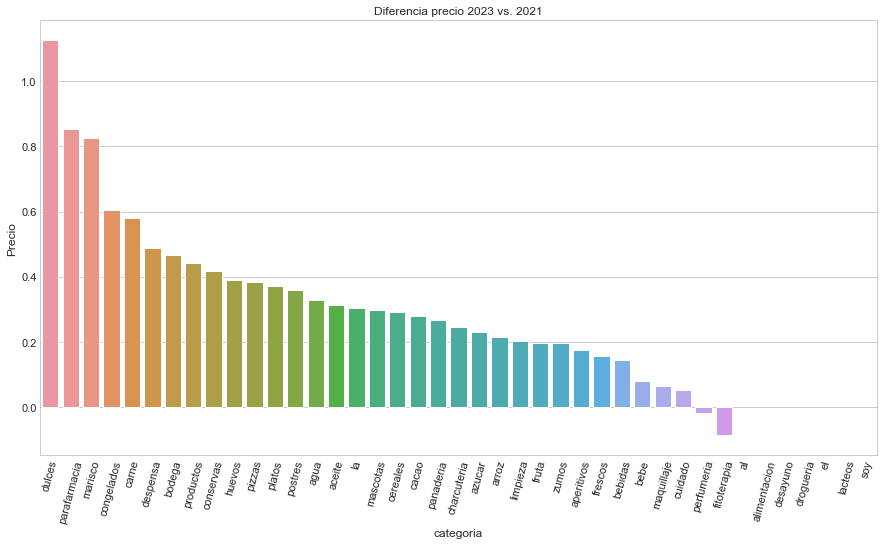

In [ ]:
f,ax=plt.subplots(1,1,figsize=(15,8))
plt.xticks(rotation=75)
plt.title('Diferencia precio 2023 vs. 2021')
sns.barplot(x=cat_año.index, y= cat_año.crecim_conjunto)
ax.set_ylabel('Precio')

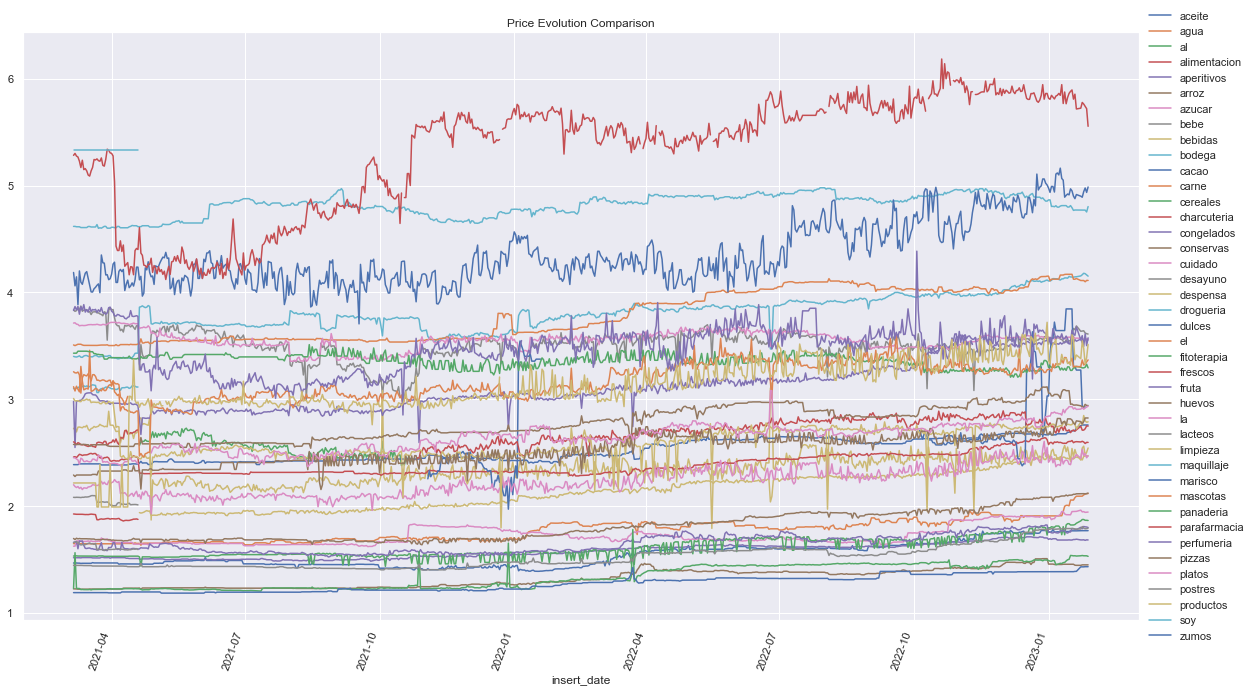

In [ ]:
df_data = pd.crosstab(aggfunc="mean",
            index = df1.insert_date,
            columns = df1.categoria,
            values = df1.price)

sns.set()

f,ax = plt.subplots(1, 1, figsize=(20,12))


for i, col in enumerate(df_data.columns):
    df_data[col].plot()

plt.title('Price Evolution Comparison')

plt.xticks(rotation=70)
plt.legend(df_data.columns,loc='center left', bbox_to_anchor=(1, 0.5))

#Saving the graph into a JPG file
plt.savefig('foo1.png', bbox_inches='tight')

## Evolution of the price for each supermarket:

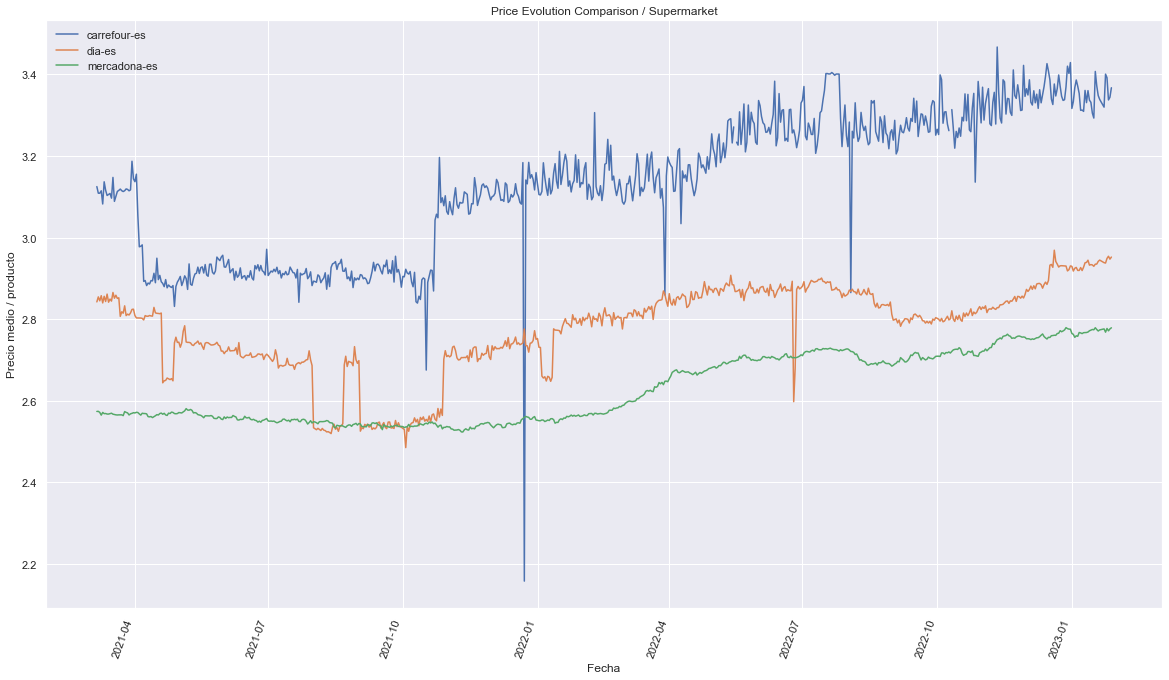

In [ ]:
df_supermarkets = pd.crosstab(aggfunc="mean",
            index = df1.insert_date,
            columns = df1.supermarket,
            values = df1.price)


f,ax = plt.subplots(1, 1, figsize=(20,12))


for i, col in enumerate(df_supermarkets.columns):
    df_supermarkets[col].plot()

plt.title('Price Evolution Comparison / Supermarket')

plt.xticks(rotation=70)
plt.legend(df_supermarkets.columns)
plt.grid(True)
plt.ylabel("Precio medio / producto")
plt.xlabel("Fecha")

#Saving the graph into a JPG file
plt.savefig('foo1.png', bbox_inches='tight')

## Calculated engineering: difference of each month for each product: **Result**

In [ ]:
df_calculated = df1

#Reset index:
df_calculated = df_calculated.reset_index(drop=True)

#we filter the dataframe with the first days of the month
df_first_day = df_calculated[df_calculated['day'] == '01']

print(f"We have {df_first_day.shape[0]} registers from first days prices")

#we filter the dataframe with the last days of each month
df_last_day01 = df_calculated[(df_calculated['day'] == '31') & (df_calculated['month'] == '01')]
df_last_day02 = df_calculated[(df_calculated['day'] == '28') & (df_calculated['month'] == '02')]
df_last_day03 = df_calculated[(df_calculated['day'] == '31') & (df_calculated['month'] == '03')]
df_last_day04 = df_calculated[(df_calculated['day'] == '30') & (df_calculated['month'] == '04')]
df_last_day05 = df_calculated[(df_calculated['day'] == '31') & (df_calculated['month'] == '05')]
df_last_day06 = df_calculated[(df_calculated['day'] == '30') & (df_calculated['month'] == '06')]
df_last_day07 = df_calculated[(df_calculated['day'] == '31') & (df_calculated['month'] == '07')]
df_last_day08 = df_calculated[(df_calculated['day'] == '31') & (df_calculated['month'] == '08')]
df_last_day09 = df_calculated[(df_calculated['day'] == '30') & (df_calculated['month'] == '09')]
df_last_day10 = df_calculated[(df_calculated['day'] == '31') & (df_calculated['month'] == '10')]
df_last_day11 = df_calculated[(df_calculated['day'] == '30') & (df_calculated['month'] == '11')]
df_last_day12 = df_calculated[(df_calculated['day'] == '31') & (df_calculated['month'] == '12')]

#concat the dataframes of the last day:

df_last_day = pd.concat([df_last_day01,
                                   df_last_day02,
                                   df_last_day03,
                                   df_last_day04,
                                   df_last_day05,
                                   df_last_day06,
                                   df_last_day07,
                                   df_last_day08,
                                   df_last_day09,
                                   df_last_day10,
                                   df_last_day11,
                                   df_last_day12], sort=False)

df_last_day = df_last_day[['price','product_id','year','month']]
print(f"We have {df_last_day.shape[0]} registers from last days prices")    

#Merge both dataframes:
result = pd.merge(df_first_day, df_last_day, on=["product_id","year","month"])
print(f"Number of rows of the merge: {result.shape[0]}")

#Calculate the difference between the prices:
result['difference'] = result['price_y'] - result['price_x']

#Categorical:
result['exist_difference'] = np.where(result['difference'] > 0, '1', '0')

#Extract the articles with differences:
differences = result[result['difference'] >0]

#Sort values per difference:
sorted = differences.sort_values('difference', ascending=False)
sorted.head(1)

We have 302556 registers from first days prices
We have 302999 registers from last days prices
Number of rows of the merge: 254685


,url,supermarket,category,name,description,price_x,reference_price,reference_unit,insert_date,product_id,categoria,year,month,day,price_y,difference,exist_difference
238102,https://www.dia.es/compra-online/despensa/lact...,dia-es,despensa_lacteos_y_huevos_leche,ASTURIANA leche entera botella 1.5 lt,NaN,1.49,0.99,l,2022-11-01,45f260fd2c30430fbe6b385da8238e6d,despensa,2022,11,01,9.9,8.41,1


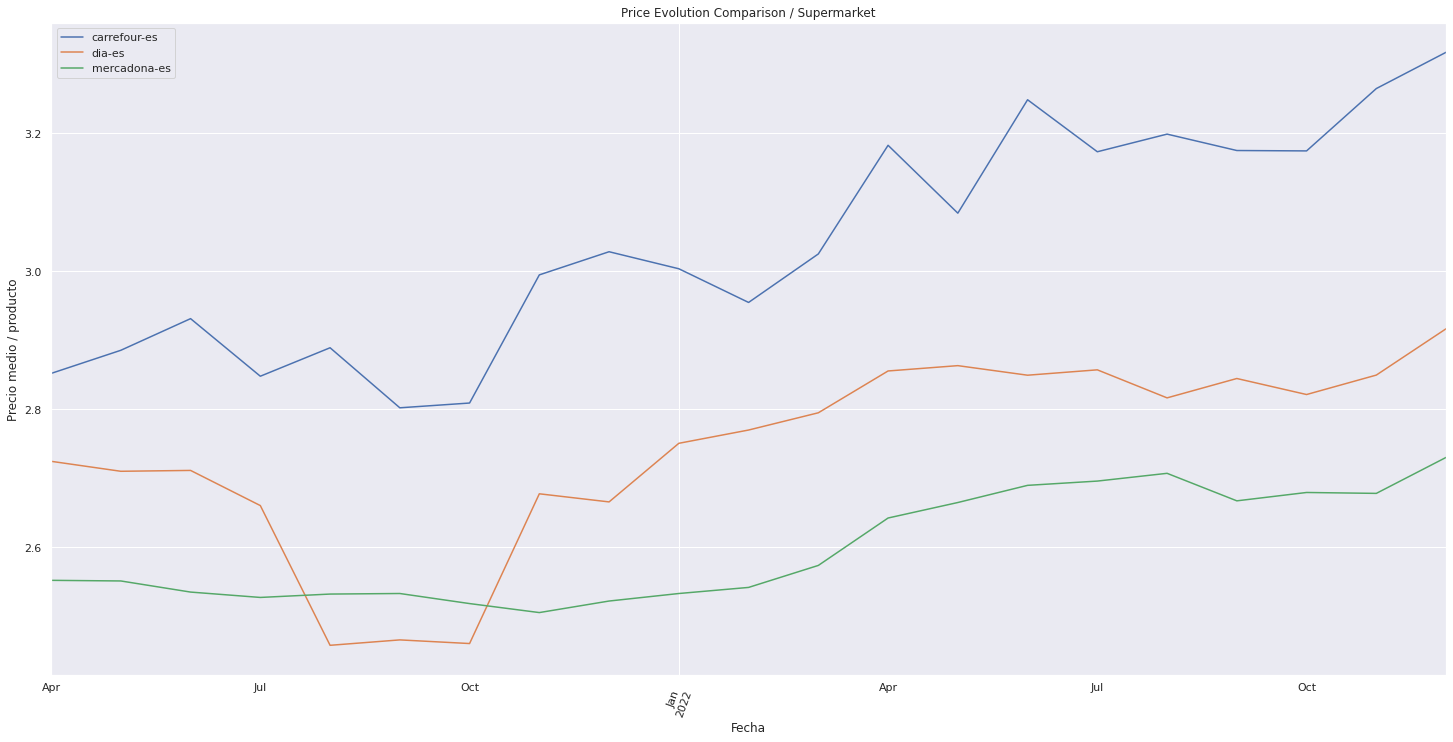

In [ ]:
df_data = pd.crosstab(aggfunc="mean",
            index = result.insert_date,
            columns = result.supermarket,
            values = result.price_x)

f,ax = plt.subplots(1, 1, figsize=(25,12))


for i, col in enumerate(df_data.columns):
    df_data[col].plot()

plt.title('Price Evolution Comparison / Supermarket')

plt.xticks(rotation=70)
plt.legend(df_data.columns)
plt.grid(True)
plt.ylabel("Precio medio / producto")
plt.xlabel("Fecha")

#Saving the graph into a JPG file
plt.savefig('foo1.png', bbox_inches='tight')

### Day of the week:

In [ ]:
df_mercadona['day_week'] = df_mercadona['insert_date'].dt.dayofweek
df_mercadona.groupby('day_week').count()[['price']]

,price
day_week,
0,552006
1,552428
2,547342
3,547259
4,547132
5,552848
6,552678


<AxesSubplot:xlabel='day_week', ylabel='count'>

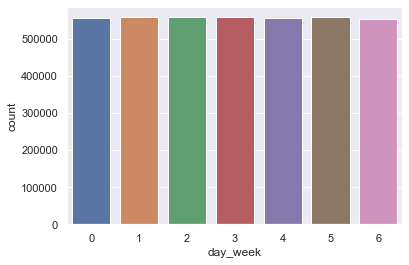

In [ ]:
sns.countplot(df_mercadona.day_week)

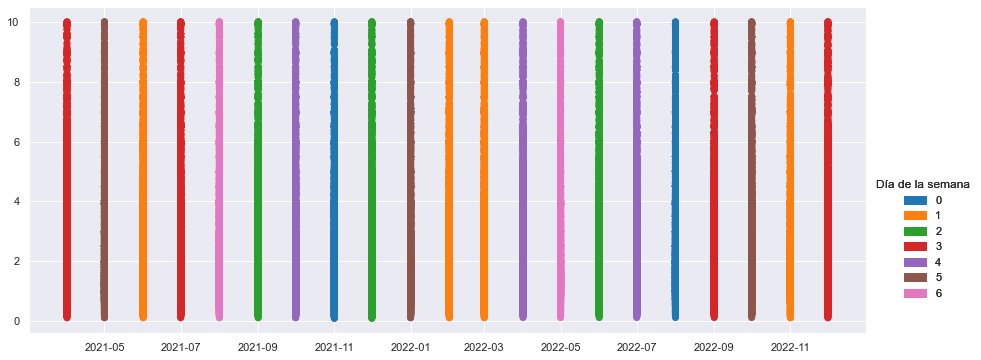

In [ ]:
dayofweek_colors = {0: 'tab:blue', 1: 'tab:orange',
                    2: 'tab:green', 3: 'tab:red', 
                    4: 'tab:purple', 5: 'tab:brown', 
                    6: 'tab:pink'}

plt.close()
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(result['insert_date'], result['price_y'], c=result['day_week'].map(dayofweek_colors))
handles = [mpatches.Patch(color=v, label=k) for v, k in zip(dayofweek_colors.values(), dayofweek_colors.keys())]
legend = ax.legend(handles=handles, bbox_to_anchor=(1, 0.5),
                   title="Día de la semana")
ax.add_artist(legend)
plt.show()

## Correlations:

Numerical cols: ['price_x', 'reference_price', 'insert_date', 'day_week', 'price_y', 'difference']
Categorical cols: ['url', 'supermarket', 'category', 'name', 'description', 'reference_unit', 'product_id', 'categoria', 'year', 'month', 'day', 'exist_difference']


<AxesSubplot:>

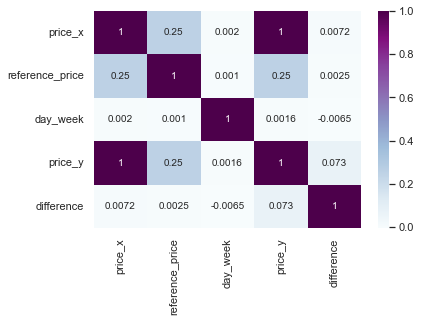

In [ ]:
#quantitative / qualitative data

numerical_cols = [f for f in result.columns if result.dtypes[f] != 'object']

categorical_cols = [f for f in result.columns
               if result.dtypes[f] == 'object']

print(f"Numerical cols: {numerical_cols}")
print(f"Categorical cols: {categorical_cols}")

heatmap_data = result[numerical_cols].corr()
sns.heatmap(heatmap_data, cmap= "BuPu", annot=True)

# Our Models we will work with the Mercadona data
Due to the better classification of the categories we are going to work with the Mercadona supermarket

## Prophet:

### Mercadona data:

In [ ]:
df_mercadona.shape

(3851693, 18)

<Figure size 720x720 with 0 Axes>

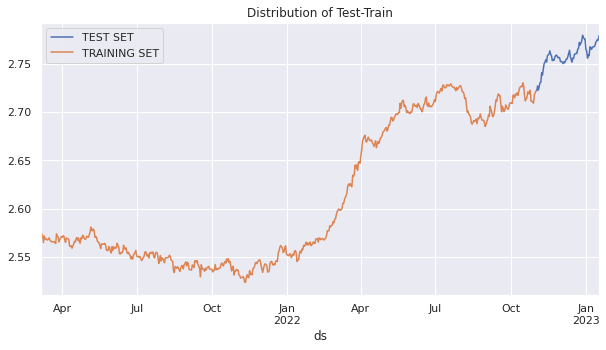

In [ ]:
#hist = df1
hist = df_mercadona

#groupby
hist = hist[['price', 'insert_date','categoria']]
hist = hist.groupby('insert_date')['price'].mean().reset_index()

#rename to use prophet
hist = hist.rename({'insert_date': 'ds', 'price': 'y'}, axis='columns')

hist = hist.set_index('ds')

#split date:

split_date = "2022-11-01"

hist_train = hist.loc[hist.index <= split_date].copy()
hist_test = hist.loc[hist.index > split_date].copy()


#plot the train and test data:
plt.figure(figsize = (10, 10))
hist_test.rename(columns={'y': 'TEST SET'}).join(hist_train.rename(columns={'y': 'TRAINING SET'}), how='outer').plot(figsize=(10, 5), title='Distribution of Test-Train', style='-', ms=1)

plt.show()

In [ ]:
# Format data for prophet model using ds and y
hist_train_prophet = hist_train.reset_index()

param_grid = {'changepoint_prior_scale': [0.002, 0.0025, 0.003],
              'monthly_prior_scale': [0.008, 0.009, 0.01], # El efecto de la estacionalidad mensual es bajo
              'yearly_prior_scale': [0.05, 0.1], # El efecto de la estacionalidad anual es más alto
             }


# Generar todas las combinaciones de parámetros a probar
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here


for params in all_params:
  #we add fix parameters
  prophet_params = {'growth':'linear',
                    'changepoints':['2022-10-15'],
                    'yearly_seasonality': False,
                    'weekly_seasonality': False,
                    'daily_seasonality': False,
                    'holidays': '',
                    'seasonality_mode': 'multiplicative',
                    'holidays_prior_scale': 1000,
                    'changepoint_prior_scale': params['changepoint_prior_scale']}
model = Prophet()
model.fit(hist_train_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmw4s3m3c/8g9e6kc2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmw4s3m3c/iz78wel9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18774', 'data', 'file=/tmp/tmpmw4s3m3c/8g9e6kc2.json', 'init=/tmp/tmpmw4s3m3c/iz78wel9.json', 'output', 'file=/tmp/tmpmw4s3m3c/prophet_modelmeimjq2p/prophet_model-20230201145653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict on test set with model

hist_test_prophet = hist_test.reset_index()

hist_test_fcst = model.predict(hist_test_prophet)

In [ ]:
hist_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-02,2.709000,2.700148,2.717502,2.709000,2.709000,-0.000357,-0.000357,-0.000357,-0.000357,-0.000357,-0.000357,0.0,0.0,0.0,2.708644
1,2022-11-03,2.708968,2.699659,2.717280,2.708968,2.708968,-0.000444,-0.000444,-0.000444,-0.000444,-0.000444,-0.000444,0.0,0.0,0.0,2.708524
2,2022-11-04,2.708935,2.699743,2.717187,2.708935,2.708935,-0.000490,-0.000490,-0.000490,-0.000490,-0.000490,-0.000490,0.0,0.0,0.0,2.708446
3,2022-11-05,2.708902,2.700002,2.718290,2.708902,2.708902,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.0,0.0,0.0,2.709221
4,2022-11-06,2.708870,2.700756,2.719170,2.708870,2.708870,0.000566,0.000566,0.000566,0.000566,0.000566,0.000566,0.0,0.0,0.0,2.709435


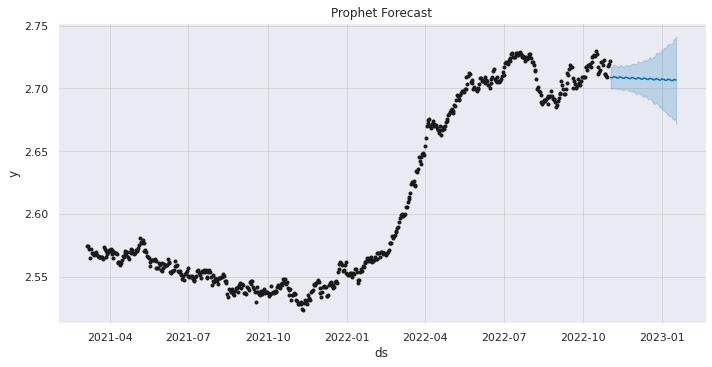

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(hist_test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

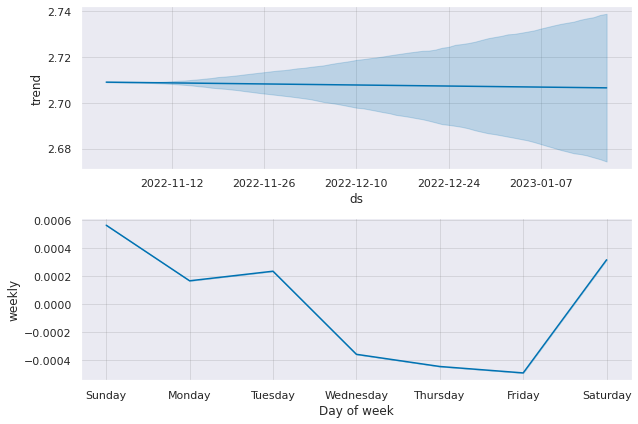

In [ ]:
fig = model.plot_components(hist_test_fcst)
plt.show()

### Compare forecast to actuals:

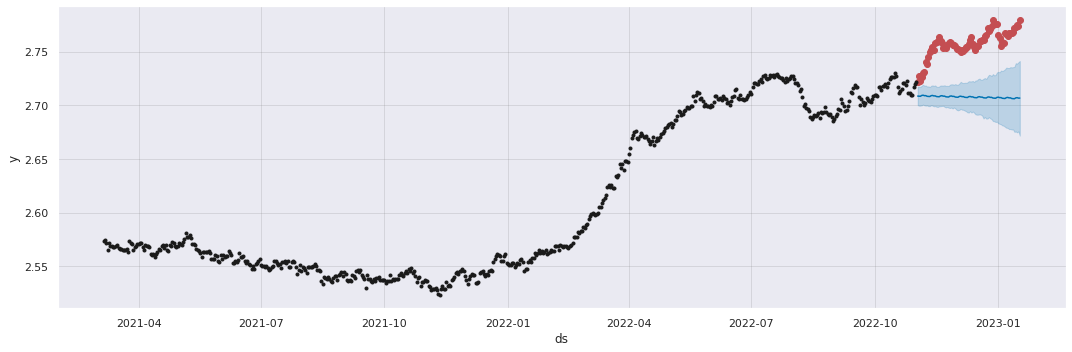

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(hist_test.index, hist_test['y'], color='r')
fig = model.plot(hist_test_fcst, ax=ax)

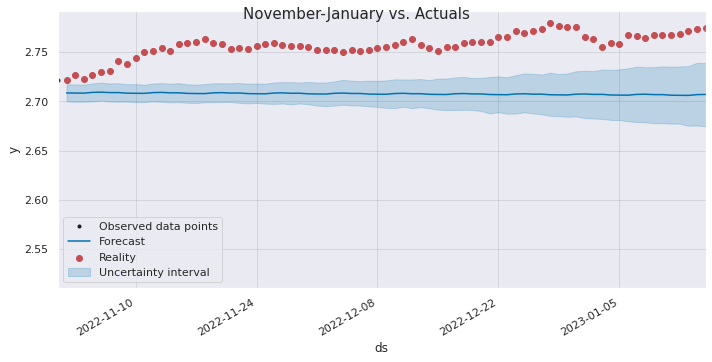

In [ ]:
import datetime

fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(hist_test.index, hist_test['y'], color='r', label='Reality')

fig = model.plot(hist_test_fcst, ax=ax)
fig.autofmt_xdate()
ax.set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 1, 15)])


ax.legend()
plot = plt.suptitle('November-January vs. Actuals', fontsize=15)

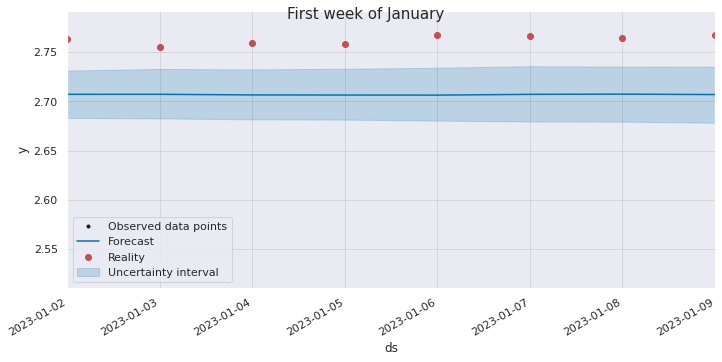

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(hist_test.index, hist_test['y'], color='r', label='Reality')

fig = model.plot(hist_test_fcst, ax=ax)
fig.autofmt_xdate()
ax.set_xlim([datetime.date(2023, 1, 2), datetime.date(2023, 1, 9)])


ax.legend()
plot = plt.suptitle('First week of January', fontsize=15)

### Evaluate the model with Error Metrics:

In [ ]:
np.sqrt(mean_squared_error(y_true=hist_test['y'],
                   y_pred=hist_test_fcst['yhat']))

0.05163624040370457

In [ ]:
mean_absolute_error(y_true=hist_test['y'],
                   y_pred=hist_test_fcst['yhat'])

0.04996695049951969

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(y_true=hist_test['y'],
                   y_pred=hist_test_fcst['yhat'])

1.8097856458911967

### Predict into the future

In [ ]:
future = model.make_future_dataframe(periods=365, freq='d', include_history=False)
forecast = model.predict(future)

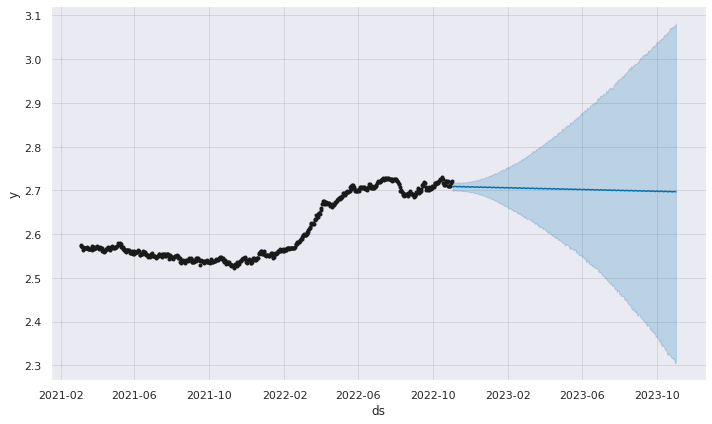

In [ ]:
figure1 = model.plot(forecast)

## Using Prophet features for XGBoost

### Extract the features of Prophet:

In [ ]:
df_mercadona.columns

Index(['url', 'supermarket', 'category', 'name', 'description', 'price',
       'reference_price', 'reference_unit', 'insert_date', 'product_id',
       'year', 'month', 'day', 'year_month', 'OBS_VALUE_ANR', 'EA_hist_value',
       'indice_ine', 'categoria'],
      dtype='object')

In [ ]:
hist1 = df_mercadona

#groupby
hist1 = hist1[['price', 'insert_date','categoria','indice_ine', 'OBS_VALUE_ANR']]
hist1 = hist1.groupby('insert_date')['price'].mean().reset_index()

#rename to use prophet
hist1 = hist1.rename({'insert_date': 'ds', 'price': 'y'}, axis='columns')

#Predict the prices of all the dataset:
hist1_fcst = model.predict(hist1)


#set the index
hist1_fcst = hist1_fcst.set_index('ds')


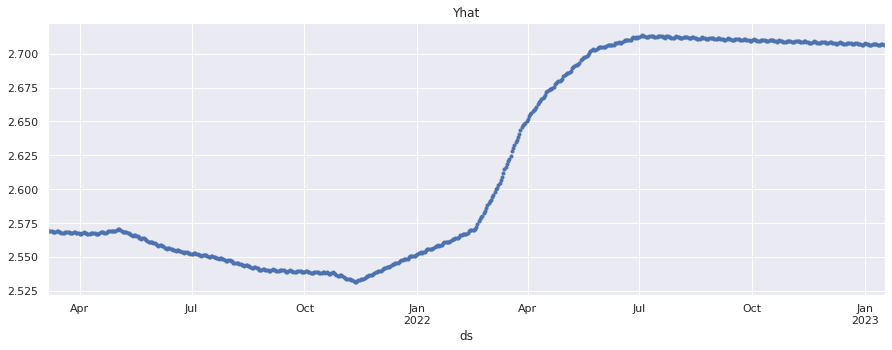

In [ ]:
hist1_fcst['yhat'].plot(style='.',
        figsize=(15, 5),
        title='Yhat')
plt.show()

### Merge df, Prophet predictions and other data (INE, ECB):

In [ ]:
hist1_fcst.columns

Index(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
df = hist1_fcst[['yhat', 'yhat_lower', 'yhat_upper','weekly', 'weekly_lower', 'weekly_upper']]

hist1 = hist1.set_index('ds')

df = df.merge(hist1[['y']], how='left', left_index=True, right_index=True)

# Calculate the residuals by subtracting the Prophet forecast from the actual values
df['residuals'] = df['y'] - df['yhat']

#separate train and test data:
train = df.loc[df.index < '11-01-2022']
test = df.loc[df.index >= '11-01-2022']

In [ ]:
#train
train['ds'] = train.index
train['ds'] = train['ds'].astype(str)


train["year"] = train.ds.apply(lambda x: x[0:4])
train["month"] = train.ds.apply(lambda x: x[5:7])
train["day"] = train.ds.apply(lambda x: x[8:10])

train["year_month"] = train['year'].astype(str) +"-"+ train["month"]

train = train.merge(df_ecb_europa[['year_month','OBS_VALUE_ANR','EA_hist_value']], on='year_month', how='left')
train = train.merge(df_ine[['year_month','indice_ine']], on='year_month', how='left')


train['ds'] = pd.to_datetime(train['ds'])
train['ds'] = pd.to_datetime(train['ds'], format='%y/%m/%d')


train = train.set_index('ds')

In [ ]:
#test
test['ds'] = test.index
test['ds'] = test['ds'].astype(str)


test["year"] = test.ds.apply(lambda x: x[0:4])
test["month"] = test.ds.apply(lambda x: x[5:7])
test["day"] = test.ds.apply(lambda x: x[8:10])
test["year_month"] = test['year'].astype(str) +"-"+ test["month"]

test = test.merge(df_ecb_europa[['year_month','OBS_VALUE_ANR','EA_hist_value']], on='year_month', how='left')
test = test.merge(df_ine[['year_month','indice_ine']], on='year_month', how='left')

test['ds'] = pd.to_datetime(test['ds'])
test['ds'] = pd.to_datetime(test['ds'], format='%y/%m/%d')


test = test.set_index('ds')

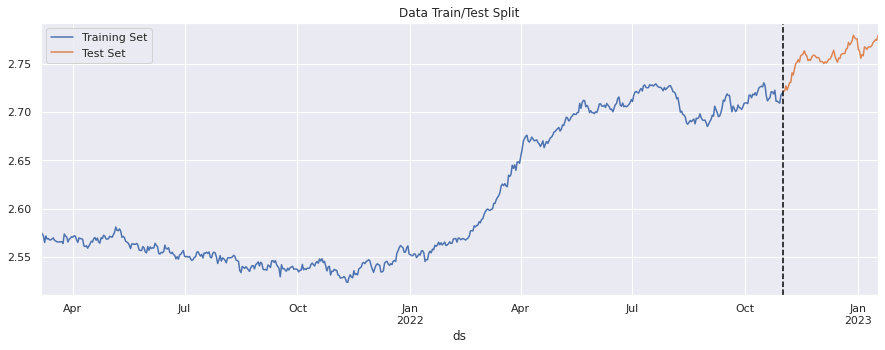

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

train['y'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['y'].plot(ax=ax, label='Test Set')

ax.axvline('11-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [ ]:
df = create_features(df)

In [ ]:
df['ds'] = df.index
df['ds'] = df['ds'].astype(str)

In [ ]:
df["year"] = df.ds.apply(lambda x: x[0:4])
df["month"] = df.ds.apply(lambda x: x[5:7])
df["day"] = df.ds.apply(lambda x: x[8:10])

df["year_month"] = df['year'].astype(str) +"-"+ df["month"]

In [ ]:
df = df.merge(df_ecb_europa[['year_month','OBS_VALUE_ANR','EA_hist_value']], on='year_month', how='left')
df = df.merge(df_ine[['year_month','indice_ine']], on='year_month', how='left')

df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = pd.to_datetime(df['ds'], format='%y/%m/%d')

df = df.set_index('ds')

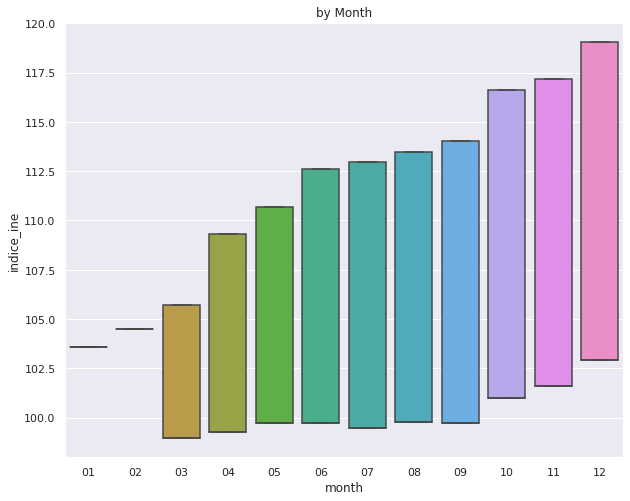

In [ ]:
df_sorted_months = df1.sort_values('month')

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_sorted_months, x='month', y='indice_ine')
ax.set_title('by Month')
plt.show()

### Create our Model:

In [ ]:
train.columns

Index(['yhat', 'yhat_lower', 'yhat_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'y', 'residuals', 'year', 'month', 'day', 'year_month',
       'OBS_VALUE_ANR', 'EA_hist_value', 'indice_ine'],
      dtype='object')

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear','yhat', 'dayofweek', 'quarter', 'month', 'year','yhat_lower', 'yhat_upper','weekly', 'weekly_lower', 'weekly_upper','OBS_VALUE_ANR','indice_ine','residuals']

TARGET = 'y'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
import xgboost as xgb

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=2000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.1
                       )
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=50,
        early_stopping_rounds=50)

[15:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.90028	validation_1-rmse:2.0467
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[50]	validation_0-rmse:0.01043	validation_1-rmse:0.051978
[100]	validation_0-rmse:0.001156	validation_1-rmse:0.038598
[150]	validation_0-rmse:0.000916	validation_1-rmse:0.037026
[200]	validation_0-rmse:0.000891	validation_1-rmse:0.036917
Stopping. Best iteration:
[155]	validation_0-rmse:0.000891	validation_1-rmse:0.036917



XGBRegressor(early_stopping_rounds=50, n_estimators=2000)

In [ ]:
test['prediction'] = reg.predict(X_test)

In [ ]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

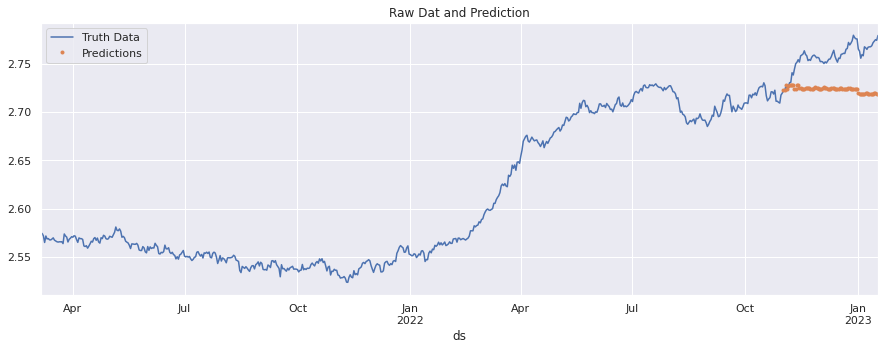

In [ ]:
ax = df[['y']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')

plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

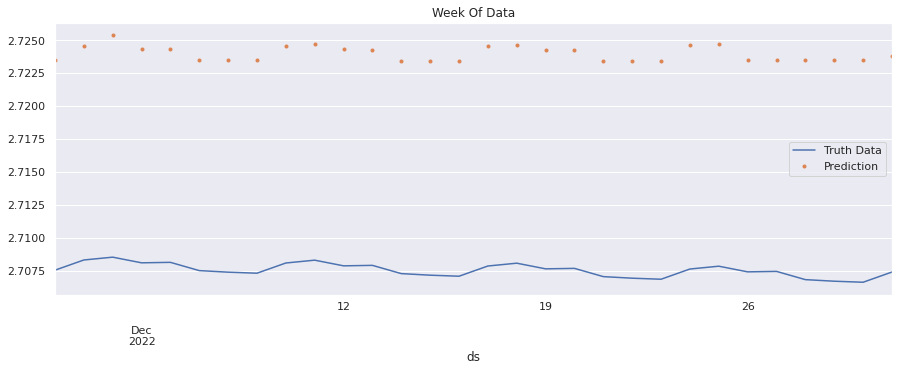

In [ ]:
ax = df.loc[(df.index > '2022-12-01') & (df.index < '2023-01-01')]['yhat'].plot(figsize=(15, 5), title='Week Of Data')


df.loc[(df.index > '2022-12-01') & (df.index < '2023-01-01')]['prediction'].plot(style='.')


plt.legend(['Truth Data','Prediction'])
plt.show()

### Future prediction:

In [ ]:
dti = pd.date_range("2023-01-17", periods=120, freq="d")

In [ ]:
df_future_dates = pd.DataFrame(dti, columns = ['Date'])
df_future_dates['y'] = np.nan
df_future_dates.index = pd.to_datetime(df_future_dates['Date'], format='%Y-%m-%d')
df_future_dates = df_future_dates[['y']]

In [ ]:
future = forecast 

future['ds'] = pd.to_datetime(future['ds'])
future['ds'] = pd.to_datetime(future['ds'], format='%y/%m/%d')

future = future.set_index('ds')

df_future = df_future_dates.merge(future, how='left', left_index=True, right_index=True)
df_future = create_features(df_future)

In [ ]:
residuals_mean = df['residuals'].mean()
indice_ine = int(input("What is the index estimated by the INE? "))
obs_value = int(input("What is the index estimated by the ECB? "))

What is the index estimated by the INE? 119
What is the index estimated by the ECB? 15


In [ ]:
df_future['OBS_VALUE_ANR'] = obs_value
df_future['indice_ine'] = indice_ine
df_future['residuals'] = residuals_mean

test_X_future = df_future[FEATURES]
test_y_future = df_future['y']

In [ ]:
test_X_future['prediction'] = reg.predict(test_X_future)

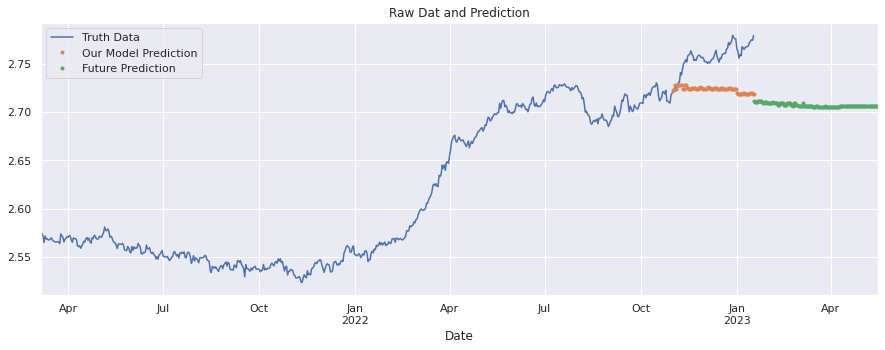

In [ ]:
ax = df[['y']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
test_X_future['prediction'].plot(ax=ax, style='.')

plt.legend(['Truth Data', 'Our Model Prediction','Future Prediction'])
ax.set_title('Raw Dat and Prediction')
plt.show()

# Another way of predicting the price:

In [ ]:
df_selected = df_mercadona

df_crosstab = pd.crosstab(aggfunc="mean",
            index = df_selected.insert_date,
            columns = df_selected.categoria,
            values = df_selected.price)

df_crosstab['price_mean'] = df_crosstab[['aceite', 'agua', 'aperitivos', 'arroz', 'azucar', 'bebe', 'bodega',
       'cacao', 'carne', 'cereales', 'charcuteria', 'congelados', 'conservas',
       'cuidado', 'fitoterapia', 'fruta', 'huevos', 'limpieza', 'maquillaje',
       'marisco', 'mascotas', 'panaderia', 'pizzas', 'postres', 'zumos']].mean(axis=1)

In [ ]:
df_crosstab

categoria,aceite,agua,aperitivos,arroz,azucar,bebe,bodega,cacao,carne,cereales,...,huevos,limpieza,maquillaje,marisco,mascotas,panaderia,pizzas,postres,zumos,price_mean
insert_date,,,,,,,,,,,,,,,,,,,,,
2021-03-06,1.465730,1.646930,1.515000,1.223583,1.623224,3.028405,3.400182,2.386645,3.507336,1.530929,...,2.575617,2.128667,4.617418,4.185794,2.416160,1.227547,2.289474,1.443716,1.188235,2.363896
2021-03-07,1.465730,1.646930,1.515000,1.223583,1.623224,3.028405,3.395952,2.386645,3.501053,1.532590,...,2.575617,2.128667,4.617418,4.060612,2.416160,1.562124,2.275760,1.443716,1.188235,2.328655
2021-03-08,1.465730,1.645903,1.515000,1.222787,1.671964,3.028405,3.394307,2.386645,3.507588,1.532590,...,2.575370,2.128667,4.613786,4.144727,2.416160,1.227547,2.289474,1.443716,1.188235,2.363739
2021-03-09,1.464407,1.646009,1.515000,1.220661,1.671964,3.028405,3.398520,2.386645,3.513843,1.530929,...,2.575370,2.128577,4.613786,3.884327,2.416160,1.227390,2.289474,1.443716,1.188235,2.351183
2021-03-10,1.464407,1.646009,1.515000,1.220661,1.671964,3.028405,3.405502,2.393841,3.513843,1.530929,...,2.575370,2.128577,4.613786,4.200278,2.416160,1.226688,2.289474,1.442896,1.188235,2.366884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13,1.760440,2.005505,1.680774,1.453905,1.918187,3.017627,3.631790,2.675738,4.168756,1.821654,...,3.078963,2.264701,4.812019,4.907755,2.899048,1.484574,2.751413,1.788156,1.384576,2.649672
2023-01-14,1.760440,2.005505,1.680774,1.453905,1.917320,3.013504,3.634125,2.689672,4.168756,1.833871,...,3.078963,2.269332,4.798565,4.920562,2.873364,1.496085,2.815376,1.788156,1.384576,2.653525
2023-01-15,1.760440,2.001066,1.682156,1.453905,1.917320,3.013504,3.640275,2.689672,4.168756,1.833871,...,3.078963,2.269332,4.798565,4.912472,2.873364,1.499784,2.815053,1.788156,1.384576,2.653767


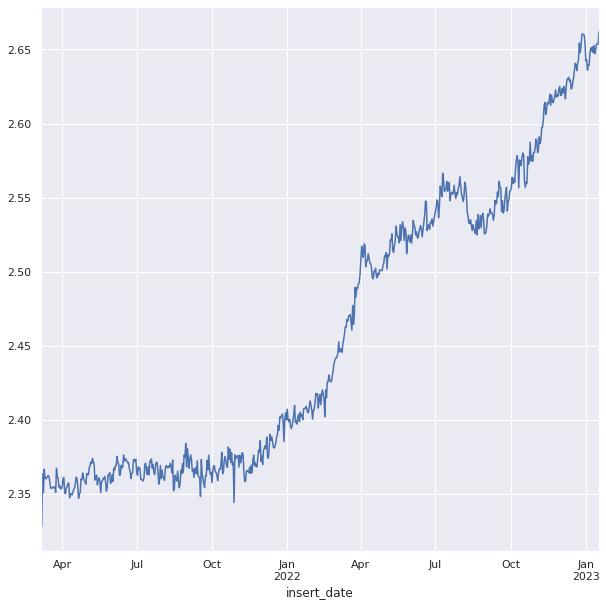

In [ ]:
ax = df_crosstab.price_mean.plot(figsize=(10, 10), subplots=True)

plt.show()

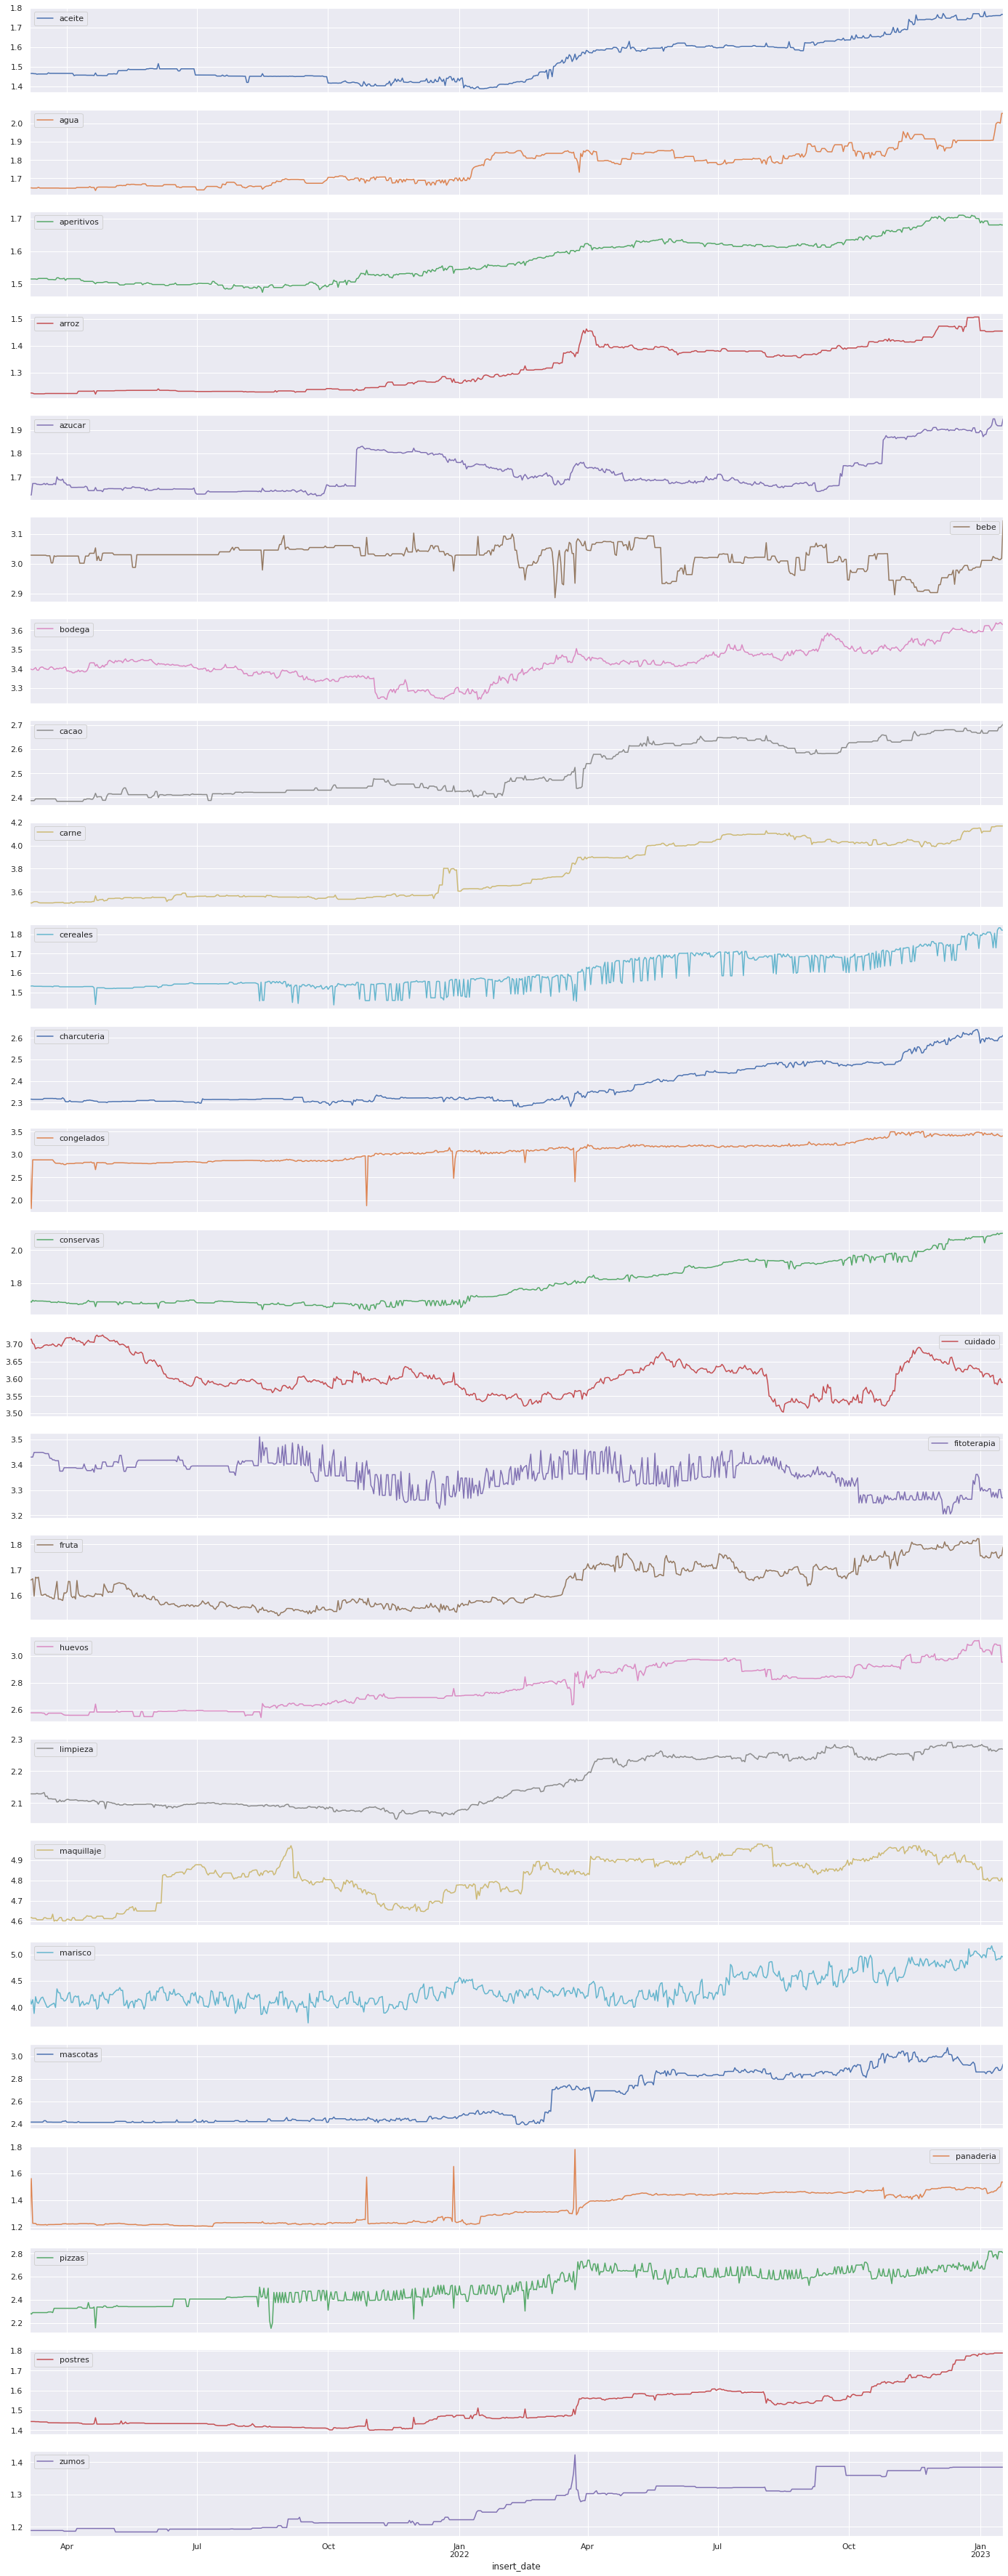

In [ ]:
ax = df_crosstab.plot(figsize=(24, 64), subplots=True)

plt.show()

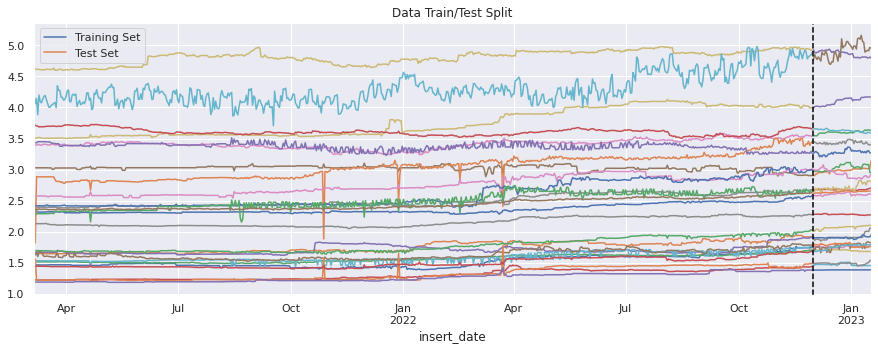

In [ ]:
df = df_crosstab[['aceite', 'agua', 'aperitivos', 'arroz', 'azucar', 'bebe', 'bodega',
       'cacao', 'carne', 'cereales', 'charcuteria', 'congelados', 'conservas',
       'cuidado', 'fitoterapia', 'fruta', 'huevos', 'limpieza', 'maquillaje',
       'marisco', 'mascotas', 'panaderia', 'pizzas', 'postres', 'zumos','price_mean']]


train = df.loc[df.index < '12-01-2022']
test = df.loc[df.index >= '12-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('12-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
df = create_features(df)

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['aceite', 'agua', 'aperitivos', 'arroz', 'azucar', 'bebe', 'bodega',
       'cacao', 'carne', 'cereales', 'charcuteria', 'congelados', 'conservas',
       'cuidado', 'fitoterapia', 'fruta', 'huevos', 'limpieza', 'maquillaje',
       'marisco', 'mascotas', 'panaderia', 'pizzas', 'postres', 'zumos']

TARGET = 'price_mean'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
import xgboost as xgb

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[10:00:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.9274	validation_1-rmse:2.11989
[100]	validation_0-rmse:0.708158	validation_1-rmse:0.840678
[200]	validation_0-rmse:0.260612	validation_1-rmse:0.361311
[300]	validation_0-rmse:0.09624	validation_1-rmse:0.169396
[400]	validation_0-rmse:0.03578	validation_1-rmse:0.093034
[500]	validation_0-rmse:0.013591	validation_1-rmse:0.063671
[600]	validation_0-rmse:0.005658	validation_1-rmse:0.050703
[700]	validation_0-rmse:0.003077	validation_1-rmse:0.044861
[800]	validation_0-rmse:0.002341	validation_1-rmse:0.04255
[900]	validation_0-rmse:0.002098	validation_1-rmse:0.041697
[999]	validation_0-rmse:0.001962	validation_1-rmse:0.041232


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=1000)

In [ ]:
test['prediction'] = reg.predict(X_test)

In [ ]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

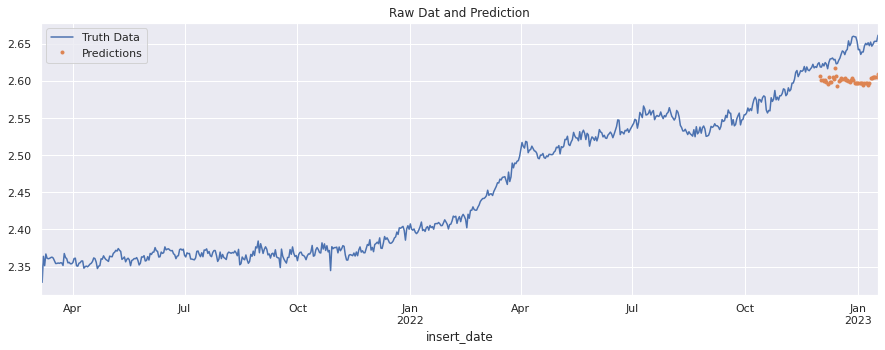

In [ ]:
ax = df[['price_mean']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')

plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

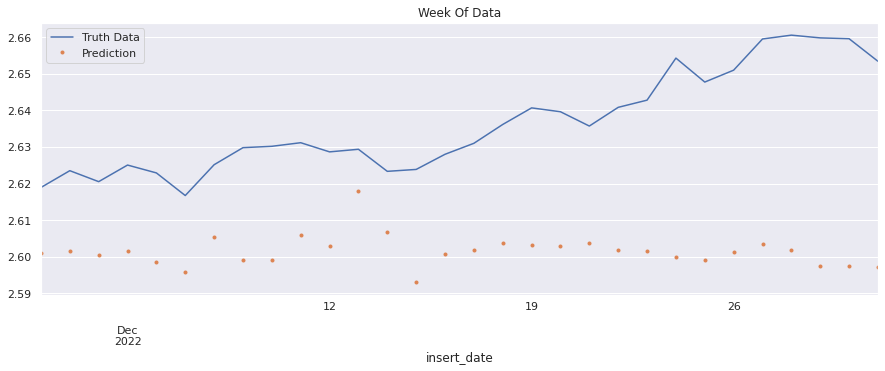

In [ ]:
ax = df.loc[(df.index > '2022-12-01') & (df.index < '2023-01-01')]['price_mean'].plot(figsize=(15, 5), title='Week Of Data')


df.loc[(df.index > '2022-12-01') & (df.index < '2023-01-01')]['prediction'].plot(style='.')


plt.legend(['Truth Data','Prediction'])
plt.show()